## Figure 8. Comparing RDD for different network depths

Imports

In [1]:
!pwd

/home/lansdell/projects/rdd_local


In [21]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

#%matplotlib inline

import matplotlib
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import numpy.random as rand
import pandas as pd
import seaborn as sns

from lib.lif import LIF_Recurrent, ParamsLIF_Recurrent
from lib.causal import causaleffect_maxv, causaleffect_maxv_linear, causaleffect_maxv_sp

Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['rand', 'axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
#Angle between two vectors
def alignment(a,b):
    da = np.dot(a,a)
    db = np.dot(b,b)
    if da > 0 and db > 0:
        return 180/np.pi*np.arccos(np.dot(a,b)/np.sqrt(da*db))
    else:
        return 360.
    
def mse(pred,true):
    return np.mean((pred - true)**2)

In [4]:
#Test LIF_Recurrent network
nsims = 1

cvals = [0.0, 0.7]
pvals = np.logspace(-2, 0, 10)
#c = 0.9
n1 = 10
n2 = 10
tau_s = 0.020
dt = 0.001
t = 100    #In seconds
sigma = 10
x = 0
#p = 0.1
DeltaT = 10

nC = len(cvals)
nP = len(pvals)

t_filter = np.linspace(0, 1, 2000)
exp_filter = np.exp(-t_filter/tau_s)
exp_filter = exp_filter/np.sum(exp_filter)
ds = exp_filter[0]

params = ParamsLIF_Recurrent(exp_filter, sigma = sigma, n1 = n1, n2 = n2)
lif = LIF_Recurrent(params, t = t)

## Test 2 hidden layer network

In [5]:
results = lif.simulate()
np.nonzero(results[1][0,:])[0].shape

(3479,)

In [6]:
print('Firing rates:',np.sum(results[1], 1)/t)

Firing rates: [34.79 34.66 34.57 34.66 34.75 34.65 34.97 34.87 34.63 35.07 26.1  21.89
 32.33 28.14 44.48 30.56 60.91 31.03 22.51 12.35]


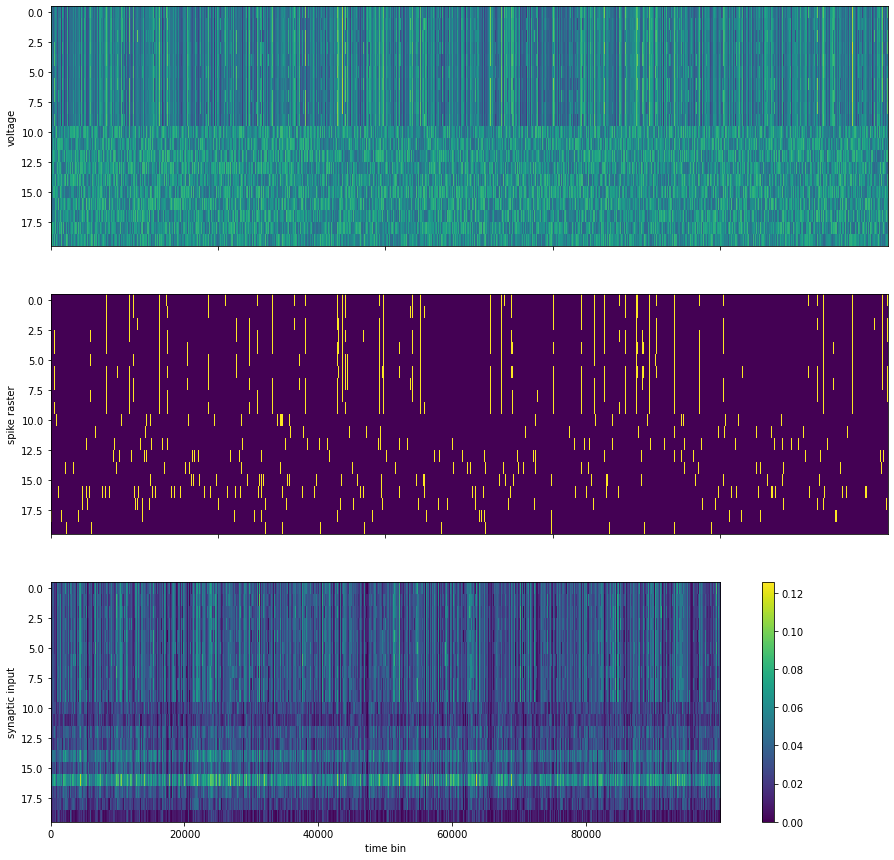

In [7]:
fig, axes = plt.subplots(3,1,figsize = (15, 15), sharex = True)
axes[0].imshow(results[0], aspect = 'auto', interpolation = 'nearest')
axes[1].imshow(results[1], aspect = 'auto', interpolation = 'nearest')
im2 = axes[2].imshow(results[3], aspect = 'auto', interpolation = 'nearest')
axes[0].set_ylabel('voltage')
axes[1].set_ylabel('spike raster')
axes[2].set_ylabel('synaptic input')
axes[2].set_xlabel('time bin')
plt.colorbar(im2, ax = axes[2])

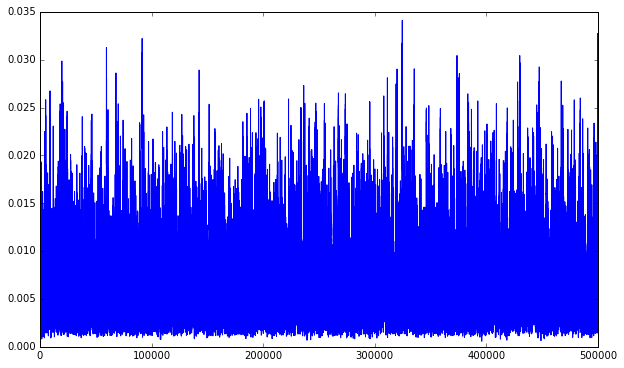

In [16]:
cost = C_orig(results[3][n1:,:])
plt.plot(cost)

## Causal effect estimation

In [13]:
U = np.eye(n2)
target = .02*np.ones((n2,1))
target[0] = 0
C_orig = lambda s: np.sum((np.dot(U, s) - target)**2,0)
nsims = 200
beta_rd_c = np.zeros((nC, nsims, nP, n1))
beta_rd_c_linear = np.zeros((nC, nsims, nP, n1))
beta_fd_c = np.zeros((nC, nsims, nP, n1))
beta_fd_c_linear = np.zeros((nC, nsims, nP, n1))

In [14]:
nsims

200

In [15]:
#Compute causal effects
for i,c in enumerate(cvals):
    print("Running %d simulations with c=%s"%(nsims, c))
    params.c = c
    lif.setup(params)
    for j in range(nsims):
        (v, h, u, sh) = lif.simulate(DeltaT)
        cost = C_orig(sh[n1:,:])
        for k,p in enumerate(pvals):
            #a = causaleffect_maxv(u[0:n1,:], cost, DeltaT, p, params)
            #print(a.shape)
            beta_rd_c[i,j,k,:] = causaleffect_maxv(u[0:n1,:], cost, DeltaT, p, params)
            beta_rd_c_linear[i,j,k,:] = causaleffect_maxv_linear(u[0:n1,:], cost, DeltaT, p, params)
        beta_fd_c[i,j,:] = causaleffect_maxv(u[0:n1,:], cost, DeltaT, 1, params)
        beta_fd_c_linear[i,j,:] = causaleffect_maxv_linear(u[0:n1,:], cost, DeltaT, 1, params)

Running 200 simulations with c=0.0
Above 68
Below 70
Above 69
Below 67
Above 64
Below 62
Above 62
Below 60
Above 67
Below 64
Above 51
Below 88
Above 60
Below 66
Above 72
Below 61
Above 51
Below 75
Above 63
Below 67
Above 106
Below 116
Above 115
Below 107
Above 101
Below 110
Above 118
Below 95
Above 112
Below 95
Above 95
Below 128
Above 98
Below 113
Above 102
Below 94
Above 84
Below 131
Above 107
Below 107
Above 171
Below 184
Above 183
Below 181
Above 172
Below 194
Above 190
Below 180
Above 189
Below 173
Above 163
Below 225
Above 176
Below 174
Above 171
Below 165
Above 155
Below 211
Above 174
Below 192
Above 286
Below 314
Above 292
Below 301
Above 306
Below 331
Above 304
Below 319
Above 323
Below 282
Above 287
Below 343
Above 296
Below 306
Above 295
Below 303
Above 275
Below 358
Above 297
Below 311
Above 461
Below 545
Above 450
Below 527
Above 487
Below 546
Above 474
Below 539
Above 506
Below 504
Above 479
Below 588
Above 489
Below 530
Above 485
Below 524
Above 482
Below 599
Above 491
B

Above 2518
Below 5089
Above 2521
Below 5042
Above 2479
Below 5025
Above 2461
Below 5083
Above 3110
Below 6592
Above 3064
Below 6644
Above 3155
Below 6553
Above 3133
Below 6598
Above 3126
Below 6609
Above 3130
Below 6581
Above 3120
Below 6586
Above 3146
Below 6568
Above 3090
Below 6630
Above 3063
Below 6649
Above 3110
Below 6592
Above 3064
Below 6644
Above 3155
Below 6553
Above 3133
Below 6598
Above 3126
Below 6609
Above 3130
Below 6581
Above 3120
Below 6586
Above 3146
Below 6568
Above 3090
Below 6630
Above 3063
Below 6649
Above 56
Below 71
Above 50
Below 67
Above 63
Below 65
Above 61
Below 74
Above 72
Below 62
Above 51
Below 54
Above 56
Below 60
Above 72
Below 72
Above 58
Below 81
Above 60
Below 63
Above 110
Below 124
Above 92
Below 112
Above 100
Below 114
Above 114
Below 112
Above 109
Below 106
Above 92
Below 101
Above 96
Below 100
Above 120
Below 114
Above 115
Below 126
Above 103
Below 118
Above 173
Below 196
Above 165
Below 184
Above 176
Below 188
Above 179
Below 167
Above 173
Below

Above 3137
Below 6543
Above 3057
Below 6653
Above 3053
Below 6652
Above 3092
Below 6632
Above 3120
Below 6599
Above 3119
Below 6554
Above 2996
Below 6713
Above 3050
Below 6641
Above 3094
Below 6631
Above 3125
Below 6612
Above 3137
Below 6543
Above 3057
Below 6653
Above 3053
Below 6652
Above 3092
Below 6632
Above 3120
Below 6599
Above 3119
Below 6554
Above 2996
Below 6713
Above 3050
Below 6641
Above 3094
Below 6631
Above 3125
Below 6612
Above 57
Below 65
Above 76
Below 56
Above 52
Below 63
Above 55
Below 62
Above 62
Below 65
Above 62
Below 61
Above 68
Below 84
Above 74
Below 74
Above 78
Below 80
Above 57
Below 73
Above 104
Below 116
Above 118
Below 104
Above 94
Below 98
Above 113
Below 92
Above 105
Below 104
Above 108
Below 103
Above 102
Below 125
Above 110
Below 112
Above 117
Below 120
Above 90
Below 128
Above 185
Below 192
Above 192
Below 181
Above 172
Below 188
Above 184
Below 156
Above 178
Below 185
Above 174
Below 191
Above 177
Below 207
Above 180
Below 183
Above 207
Below 174
Abov

Above 3066
Below 6624
Above 3136
Below 6577
Above 3109
Below 6600
Above 3155
Below 6577
Above 3107
Below 6604
Above 3175
Below 6539
Above 3053
Below 6639
Above 3104
Below 6611
Above 3112
Below 6564
Above 3187
Below 6522
Above 3066
Below 6624
Above 3136
Below 6577
Above 3109
Below 6600
Above 3155
Below 6577
Above 3107
Below 6604
Above 3175
Below 6539
Above 3053
Below 6639
Above 3104
Below 6611
Above 3112
Below 6564
Above 3187
Below 6522
Above 90
Below 63
Above 72
Below 63
Above 81
Below 73
Above 74
Below 78
Above 60
Below 55
Above 51
Below 80
Above 51
Below 74
Above 66
Below 70
Above 70
Below 72
Above 59
Below 49
Above 140
Below 100
Above 110
Below 111
Above 132
Below 118
Above 114
Below 118
Above 101
Below 103
Above 86
Below 118
Above 98
Below 116
Above 113
Below 114
Above 111
Below 104
Above 107
Below 93
Above 199
Below 172
Above 187
Below 182
Above 191
Below 190
Above 199
Below 186
Above 163
Below 168
Above 146
Below 201
Above 171
Below 176
Above 196
Below 200
Above 176
Below 193
Abo

Above 3055
Below 6662
Above 3117
Below 6573
Above 3087
Below 6628
Above 3061
Below 6655
Above 3087
Below 6633
Above 3124
Below 6587
Above 3138
Below 6602
Above 3058
Below 6657
Above 3108
Below 6597
Above 3033
Below 6689
Above 3055
Below 6662
Above 3117
Below 6573
Above 3087
Below 6628
Above 3061
Below 6655
Above 3087
Below 6633
Above 3124
Below 6587
Above 3138
Below 6602
Above 3058
Below 6657
Above 3108
Below 6597
Above 3033
Below 6689
Above 72
Below 67
Above 58
Below 58
Above 60
Below 76
Above 57
Below 56
Above 62
Below 62
Above 74
Below 67
Above 67
Below 77
Above 65
Below 58
Above 62
Below 67
Above 56
Below 72
Above 130
Below 106
Above 109
Below 99
Above 116
Below 117
Above 102
Below 99
Above 106
Below 113
Above 116
Below 109
Above 126
Below 124
Above 113
Below 100
Above 114
Below 97
Above 116
Below 118
Above 197
Below 175
Above 190
Below 171
Above 190
Below 193
Above 164
Below 165
Above 182
Below 189
Above 182
Below 174
Above 187
Below 204
Above 192
Below 169
Above 177
Below 173
Abo

Above 2575
Below 5026
Above 3125
Below 6581
Above 3135
Below 6561
Above 3100
Below 6568
Above 3113
Below 6613
Above 3132
Below 6596
Above 3164
Below 6527
Above 3103
Below 6584
Above 3128
Below 6578
Above 3118
Below 6598
Above 3162
Below 6562
Above 3125
Below 6581
Above 3135
Below 6561
Above 3100
Below 6568
Above 3113
Below 6613
Above 3132
Below 6596
Above 3164
Below 6527
Above 3103
Below 6584
Above 3128
Below 6578
Above 3118
Below 6598
Above 3162
Below 6562
Above 85
Below 70
Above 62
Below 73
Above 67
Below 62
Above 62
Below 58
Above 63
Below 60
Above 72
Below 73
Above 58
Below 75
Above 76
Below 64
Above 78
Below 60
Above 56
Below 65
Above 130
Below 117
Above 107
Below 124
Above 107
Below 117
Above 119
Below 102
Above 121
Below 118
Above 113
Below 123
Above 97
Below 110
Above 117
Below 111
Above 123
Below 93
Above 101
Below 113
Above 202
Below 200
Above 169
Below 201
Above 185
Below 194
Above 181
Below 178
Above 199
Below 193
Above 193
Below 201
Above 170
Below 191
Above 179
Below 191


Above 2508
Below 5100
Above 2503
Below 5168
Above 2468
Below 5129
Above 2514
Below 5057
Above 2532
Below 5108
Above 3133
Below 6604
Above 3146
Below 6561
Above 3096
Below 6605
Above 3101
Below 6603
Above 3105
Below 6618
Above 3085
Below 6642
Above 3040
Below 6677
Above 3073
Below 6623
Above 3071
Below 6647
Above 3154
Below 6557
Above 3133
Below 6604
Above 3146
Below 6561
Above 3096
Below 6605
Above 3101
Below 6603
Above 3105
Below 6618
Above 3085
Below 6642
Above 3040
Below 6677
Above 3073
Below 6623
Above 3071
Below 6647
Above 3154
Below 6557
Above 78
Below 67
Above 59
Below 60
Above 53
Below 73
Above 66
Below 66
Above 75
Below 63
Above 62
Below 68
Above 62
Below 73
Above 69
Below 67
Above 62
Below 69
Above 61
Below 59
Above 120
Below 126
Above 107
Below 91
Above 97
Below 102
Above 113
Below 119
Above 115
Below 107
Above 106
Below 115
Above 97
Below 111
Above 114
Below 113
Above 101
Below 109
Above 94
Below 96
Above 196
Below 216
Above 188
Below 151
Above 151
Below 176
Above 170
Below

Above 3121
Below 6581
Above 3018
Below 6641
Above 3164
Below 6555
Above 3155
Below 6553
Above 3091
Below 6616
Above 3111
Below 6567
Above 3142
Below 6558
Above 3021
Below 6689
Above 3089
Below 6631
Above 3003
Below 6690
Above 3121
Below 6581
Above 3018
Below 6641
Above 3164
Below 6555
Above 3155
Below 6553
Above 3091
Below 6616
Above 3111
Below 6567
Above 3142
Below 6558
Above 3021
Below 6689
Above 3089
Below 6631
Above 3003
Below 6690
Above 76
Below 57
Above 76
Below 71
Above 65
Below 72
Above 69
Below 61
Above 47
Below 76
Above 57
Below 79
Above 78
Below 64
Above 47
Below 63
Above 75
Below 72
Above 50
Below 55
Above 122
Below 99
Above 113
Below 121
Above 99
Below 135
Above 119
Below 126
Above 105
Below 127
Above 103
Below 123
Above 123
Below 111
Above 91
Below 104
Above 118
Below 120
Above 90
Below 97
Above 188
Below 179
Above 188
Below 197
Above 172
Below 229
Above 191
Below 206
Above 182
Below 190
Above 176
Below 212
Above 176
Below 196
Above 153
Below 181
Above 187
Below 181
Above

Above 2569
Below 5052
Above 2557
Below 5132
Above 2534
Below 5085
Above 2479
Below 5132
Above 2534
Below 5057
Above 2545
Below 5017
Above 2581
Below 5122
Above 2477
Below 5158
Above 2469
Below 5130
Above 2556
Below 5007
Above 3175
Below 6535
Above 3139
Below 6585
Above 3119
Below 6627
Above 3055
Below 6634
Above 3137
Below 6539
Above 3127
Below 6580
Above 3131
Below 6584
Above 3069
Below 6652
Above 3040
Below 6648
Above 3166
Below 6559
Above 3175
Below 6535
Above 3139
Below 6585
Above 3119
Below 6627
Above 3055
Below 6634
Above 3137
Below 6539
Above 3127
Below 6580
Above 3131
Below 6584
Above 3069
Below 6652
Above 3040
Below 6648
Above 3166
Below 6559
Above 62
Below 66
Above 63
Below 73
Above 54
Below 58
Above 64
Below 53
Above 69
Below 60
Above 62
Below 55
Above 62
Below 73
Above 69
Below 70
Above 55
Below 69
Above 65
Below 69
Above 113
Below 108
Above 108
Below 121
Above 91
Below 103
Above 110
Below 101
Above 117
Below 99
Above 100
Below 84
Above 100
Below 114
Above 118
Below 114
Abo

Above 2474
Below 5141
Above 2508
Below 5049
Above 2473
Below 5079
Above 2602
Below 5047
Above 2625
Below 5042
Above 2558
Below 5022
Above 2491
Below 5078
Above 2552
Below 5021
Above 2548
Below 4991
Above 2517
Below 5077
Above 3094
Below 6616
Above 3129
Below 6588
Above 3073
Below 6620
Above 3179
Below 6514
Above 3182
Below 6540
Above 3154
Below 6536
Above 3066
Below 6622
Above 3156
Below 6578
Above 3140
Below 6563
Above 3071
Below 6620
Above 3094
Below 6616
Above 3129
Below 6588
Above 3073
Below 6620
Above 3179
Below 6514
Above 3182
Below 6540
Above 3154
Below 6536
Above 3066
Below 6622
Above 3156
Below 6578
Above 3140
Below 6563
Above 3071
Below 6620
Above 59
Below 65
Above 59
Below 65
Above 63
Below 59
Above 61
Below 87
Above 65
Below 67
Above 67
Below 73
Above 63
Below 54
Above 60
Below 50
Above 71
Below 79
Above 40
Below 51
Above 107
Below 105
Above 108
Below 103
Above 124
Below 110
Above 106
Below 139
Above 97
Below 120
Above 110
Below 115
Above 103
Below 97
Above 98
Below 97
Abov

Above 2513
Below 5138
Above 2506
Below 5089
Above 2513
Below 5065
Above 2468
Below 5094
Above 2538
Below 5033
Above 2526
Below 5108
Above 2451
Below 5161
Above 2526
Below 5003
Above 2517
Below 5118
Above 2460
Below 5085
Above 3107
Below 6613
Above 3109
Below 6604
Above 3098
Below 6578
Above 3065
Below 6615
Above 3114
Below 6591
Above 3109
Below 6602
Above 3056
Below 6630
Above 3170
Below 6566
Above 3083
Below 6640
Above 3079
Below 6595
Above 3107
Below 6613
Above 3109
Below 6604
Above 3098
Below 6578
Above 3065
Below 6615
Above 3114
Below 6591
Above 3109
Below 6602
Above 3056
Below 6630
Above 3170
Below 6566
Above 3083
Below 6640
Above 3079
Below 6595
Above 67
Below 66
Above 73
Below 75
Above 58
Below 66
Above 59
Below 65
Above 66
Below 65
Above 60
Below 64
Above 53
Below 68
Above 74
Below 62
Above 59
Below 74
Above 76
Below 64
Above 116
Below 112
Above 116
Below 123
Above 97
Below 117
Above 101
Below 103
Above 111
Below 118
Above 108
Below 112
Above 95
Below 115
Above 117
Below 105
Ab

Above 2527
Below 5025
Above 2523
Below 5081
Above 2520
Below 5152
Above 2467
Below 5124
Above 3162
Below 6539
Above 3188
Below 6512
Above 3033
Below 6689
Above 3173
Below 6525
Above 3159
Below 6579
Above 3144
Below 6582
Above 3156
Below 6566
Above 3110
Below 6612
Above 3097
Below 6651
Above 3054
Below 6650
Above 3162
Below 6539
Above 3188
Below 6512
Above 3033
Below 6689
Above 3173
Below 6525
Above 3159
Below 6579
Above 3144
Below 6582
Above 3156
Below 6566
Above 3110
Below 6612
Above 3097
Below 6651
Above 3054
Below 6650
Above 75
Below 60
Above 63
Below 62
Above 80
Below 71
Above 62
Below 71
Above 66
Below 73
Above 59
Below 62
Above 58
Below 80
Above 70
Below 66
Above 72
Below 68
Above 58
Below 64
Above 116
Below 109
Above 106
Below 102
Above 122
Below 120
Above 107
Below 127
Above 99
Below 117
Above 102
Below 95
Above 97
Below 127
Above 115
Below 107
Above 124
Below 119
Above 116
Below 109
Above 188
Below 185
Above 190
Below 185
Above 191
Below 196
Above 166
Below 204
Above 167
Below

Above 3058
Below 6671
Above 2981
Below 6736
Above 3138
Below 6570
Above 3065
Below 6652
Above 3122
Below 6564
Above 3144
Below 6550
Above 3119
Below 6618
Above 3148
Below 6540
Above 3133
Below 6563
Above 3092
Below 6632
Above 3058
Below 6671
Above 2981
Below 6736
Above 3138
Below 6570
Above 3065
Below 6652
Above 3122
Below 6564
Above 3144
Below 6550
Above 3119
Below 6618
Above 3148
Below 6540
Above 3133
Below 6563
Above 3092
Below 6632
Above 55
Below 70
Above 66
Below 79
Above 71
Below 84
Above 70
Below 61
Above 56
Below 63
Above 68
Below 67
Above 70
Below 53
Above 59
Below 55
Above 61
Below 79
Above 50
Below 79
Above 94
Below 116
Above 98
Below 132
Above 114
Below 130
Above 109
Below 114
Above 105
Below 123
Above 117
Below 104
Above 108
Below 100
Above 104
Below 102
Above 89
Below 125
Above 99
Below 117
Above 160
Below 192
Above 173
Below 209
Above 187
Below 214
Above 173
Below 170
Above 172
Below 216
Above 191
Below 181
Above 180
Below 180
Above 167
Below 187
Above 149
Below 199
Abov

Above 3072
Below 6644
Above 3116
Below 6595
Above 3081
Below 6627
Above 3034
Below 6661
Above 3090
Below 6608
Above 3107
Below 6583
Above 3158
Below 6560
Above 3147
Below 6558
Above 3103
Below 6603
Above 3061
Below 6627
Above 3072
Below 6644
Above 3116
Below 6595
Above 3081
Below 6627
Above 3034
Below 6661
Above 3090
Below 6608
Above 3107
Below 6583
Above 3158
Below 6560
Above 3147
Below 6558
Above 3103
Below 6603
Above 3061
Below 6627
Above 56
Below 56
Above 66
Below 79
Above 57
Below 81
Above 72
Below 68
Above 68
Below 75
Above 64
Below 62
Above 65
Below 59
Above 69
Below 58
Above 60
Below 84
Above 70
Below 54
Above 86
Below 111
Above 100
Below 121
Above 91
Below 135
Above 122
Below 120
Above 109
Below 112
Above 108
Below 102
Above 107
Below 97
Above 104
Below 99
Above 94
Below 128
Above 112
Below 103
Above 154
Below 185
Above 167
Below 187
Above 163
Below 220
Above 184
Below 193
Above 172
Below 183
Above 172
Below 180
Above 181
Below 173
Above 180
Below 174
Above 155
Below 196
Above

Above 2533
Below 5045
Above 2496
Below 5143
Above 2492
Below 5160
Above 2473
Below 5094
Above 2514
Below 5047
Above 2514
Below 5056
Above 2472
Below 5095
Above 2495
Below 5062
Above 2508
Below 5104
Above 2523
Below 5122
Above 3158
Below 6543
Above 3094
Below 6638
Above 3101
Below 6604
Above 3070
Below 6618
Above 3114
Below 6580
Above 3113
Below 6558
Above 3053
Below 6644
Above 3103
Below 6608
Above 3119
Below 6588
Above 3134
Below 6595
Above 3158
Below 6543
Above 3094
Below 6638
Above 3101
Below 6604
Above 3070
Below 6618
Above 3114
Below 6580
Above 3113
Below 6558
Above 3053
Below 6644
Above 3103
Below 6608
Above 3119
Below 6588
Above 3134
Below 6595
Above 77
Below 74
Above 59
Below 68
Above 69
Below 55
Above 71
Below 64
Above 62
Below 73
Above 60
Below 66
Above 67
Below 66
Above 74
Below 60
Above 53
Below 69
Above 73
Below 68
Above 115
Below 110
Above 105
Below 111
Above 115
Below 107
Above 112
Below 112
Above 117
Below 108
Above 108
Below 111
Above 116
Below 94
Above 119
Below 109
A

Above 2537
Below 5092
Above 2526
Below 5055
Above 2577
Below 5012
Above 2545
Below 5038
Above 2508
Below 5076
Above 2490
Below 5087
Above 2555
Below 5054
Above 2579
Below 5023
Above 2471
Below 5131
Above 2407
Below 5152
Above 3135
Below 6581
Above 3095
Below 6615
Above 3130
Below 6586
Above 3181
Below 6535
Above 3080
Below 6591
Above 3094
Below 6610
Above 3148
Below 6582
Above 3182
Below 6538
Above 3093
Below 6619
Above 3033
Below 6703
Above 3135
Below 6581
Above 3095
Below 6615
Above 3130
Below 6586
Above 3181
Below 6535
Above 3080
Below 6591
Above 3094
Below 6610
Above 3148
Below 6582
Above 3182
Below 6538
Above 3093
Below 6619
Above 3033
Below 6703
Above 61
Below 75
Above 60
Below 65
Above 70
Below 59
Above 76
Below 69
Above 62
Below 78
Above 54
Below 65
Above 72
Below 72
Above 67
Below 64
Above 61
Below 69
Above 58
Below 69
Above 113
Below 116
Above 93
Below 110
Above 117
Below 106
Above 116
Below 107
Above 102
Below 114
Above 93
Below 102
Above 123
Below 118
Above 110
Below 109
Ab

Above 3171
Below 6544
Above 3186
Below 6547
Above 3133
Below 6611
Above 3133
Below 6572
Above 3034
Below 6651
Above 3106
Below 6631
Above 3132
Below 6565
Above 3144
Below 6556
Above 3090
Below 6647
Above 3112
Below 6579
Above 3171
Below 6544
Above 3186
Below 6547
Above 3133
Below 6611
Above 3133
Below 6572
Above 3034
Below 6651
Above 3106
Below 6631
Above 3132
Below 6565
Above 3144
Below 6556
Above 3090
Below 6647
Above 3112
Below 6579
Above 72
Below 88
Above 72
Below 68
Above 60
Below 63
Above 66
Below 60
Above 65
Below 74
Above 46
Below 60
Above 82
Below 72
Above 78
Below 66
Above 69
Below 68
Above 73
Below 66
Above 108
Below 125
Above 117
Below 116
Above 96
Below 106
Above 102
Below 101
Above 103
Below 116
Above 89
Below 103
Above 123
Below 125
Above 123
Below 125
Above 119
Below 114
Above 123
Below 111
Above 179
Below 197
Above 181
Below 191
Above 181
Below 172
Above 186
Below 167
Above 173
Below 175
Above 161
Below 169
Above 204
Below 201
Above 190
Below 200
Above 191
Below 192
Ab

Above 3126
Below 6556
Above 3119
Below 6592
Above 3073
Below 6655
Above 3102
Below 6589
Above 3177
Below 6553
Above 3140
Below 6587
Above 3143
Below 6549
Above 3135
Below 6593
Above 3134
Below 6585
Above 3098
Below 6638
Above 3126
Below 6556
Above 3119
Below 6592
Above 3073
Below 6655
Above 3102
Below 6589
Above 3177
Below 6553
Above 3140
Below 6587
Above 3143
Below 6549
Above 3135
Below 6593
Above 3134
Below 6585
Above 3098
Below 6638
Above 73
Below 63
Above 75
Below 75
Above 59
Below 50
Above 51
Below 65
Above 73
Below 86
Above 73
Below 63
Above 57
Below 74
Above 65
Below 67
Above 71
Below 66
Above 61
Below 59
Above 118
Below 111
Above 120
Below 128
Above 108
Below 96
Above 88
Below 105
Above 115
Below 118
Above 113
Below 116
Above 98
Below 116
Above 109
Below 119
Above 107
Below 123
Above 114
Below 110
Above 182
Below 191
Above 183
Below 188
Above 179
Below 172
Above 149
Below 181
Above 199
Below 198
Above 183
Below 185
Above 175
Below 209
Above 171
Below 189
Above 188
Below 202
Abo

Above 3130
Below 6590
Above 3090
Below 6603
Above 3061
Below 6680
Above 3083
Below 6676
Above 3176
Below 6539
Above 3103
Below 6598
Above 3073
Below 6653
Above 3156
Below 6566
Above 3077
Below 6592
Above 3119
Below 6578
Above 3130
Below 6590
Above 3090
Below 6603
Above 3061
Below 6680
Above 3083
Below 6676
Above 3176
Below 6539
Above 3103
Below 6598
Above 3073
Below 6653
Above 3156
Below 6566
Above 3077
Below 6592
Above 3119
Below 6578
Above 46
Below 67
Above 70
Below 60
Above 66
Below 51
Above 62
Below 64
Above 66
Below 65
Above 85
Below 66
Above 60
Below 66
Above 60
Below 64
Above 65
Below 62
Above 56
Below 67
Above 82
Below 121
Above 119
Below 91
Above 106
Below 97
Above 106
Below 107
Above 111
Below 101
Above 122
Below 106
Above 112
Below 101
Above 100
Below 110
Above 109
Below 98
Above 84
Below 111
Above 149
Below 208
Above 188
Below 149
Above 185
Below 177
Above 182
Below 191
Above 188
Below 179
Above 201
Below 184
Above 183
Below 179
Above 177
Below 184
Above 185
Below 166
Above

Above 2552
Below 4994
Above 2494
Below 5107
Above 2507
Below 5150
Above 2545
Below 5093
Above 2545
Below 5020
Above 2488
Below 5094
Above 2490
Below 5024
Above 2528
Below 5045
Above 2592
Below 4989
Above 2581
Below 5065
Above 3149
Below 6560
Above 3086
Below 6633
Above 3071
Below 6631
Above 3125
Below 6597
Above 3125
Below 6550
Above 3102
Below 6606
Above 3129
Below 6531
Above 3127
Below 6562
Above 3208
Below 6516
Above 3152
Below 6570
Above 3149
Below 6560
Above 3086
Below 6633
Above 3071
Below 6631
Above 3125
Below 6597
Above 3125
Below 6550
Above 3102
Below 6606
Above 3129
Below 6531
Above 3127
Below 6562
Above 3208
Below 6516
Above 3152
Below 6570
Above 71
Below 57
Above 74
Below 63
Above 67
Below 54
Above 67
Below 63
Above 64
Below 60
Above 84
Below 53
Above 61
Below 58
Above 73
Below 55
Above 69
Below 55
Above 57
Below 74
Above 102
Below 108
Above 124
Below 109
Above 111
Below 94
Above 112
Below 110
Above 117
Below 110
Above 129
Below 96
Above 103
Below 99
Above 114
Below 94
Abov

Above 3139
Below 6563
Above 3075
Below 6621
Above 3092
Below 6631
Above 3087
Below 6619
Above 3110
Below 6610
Above 3157
Below 6562
Above 3174
Below 6553
Above 3088
Below 6602
Above 3103
Below 6616
Above 3123
Below 6581
Above 3139
Below 6563
Above 3075
Below 6621
Above 3092
Below 6631
Above 3087
Below 6619
Above 3110
Below 6610
Above 3157
Below 6562
Above 3174
Below 6553
Above 3088
Below 6602
Above 3103
Below 6616
Above 3123
Below 6581
Above 59
Below 60
Above 69
Below 69
Above 66
Below 65
Above 73
Below 76
Above 76
Below 71
Above 58
Below 60
Above 56
Below 58
Above 75
Below 60
Above 77
Below 66
Above 69
Below 77
Above 107
Below 117
Above 114
Below 111
Above 99
Below 117
Above 115
Below 120
Above 115
Below 113
Above 104
Below 96
Above 86
Below 107
Above 124
Below 97
Above 124
Below 104
Above 107
Below 116
Above 164
Below 193
Above 194
Below 170
Above 169
Below 176
Above 205
Below 184
Above 191
Below 187
Above 185
Below 175
Above 159
Below 177
Above 187
Below 173
Above 182
Below 173
Abov

Above 2572
Below 5040
Above 3078
Below 6603
Above 3140
Below 6570
Above 3141
Below 6577
Above 3042
Below 6668
Above 3107
Below 6590
Above 3155
Below 6555
Above 3126
Below 6576
Above 3049
Below 6666
Above 3119
Below 6567
Above 3129
Below 6566
Above 3078
Below 6603
Above 3140
Below 6570
Above 3141
Below 6577
Above 3042
Below 6668
Above 3107
Below 6590
Above 3155
Below 6555
Above 3126
Below 6576
Above 3049
Below 6666
Above 3119
Below 6567
Above 3129
Below 6566
Above 52
Below 63
Above 58
Below 79
Above 57
Below 60
Above 56
Below 65
Above 66
Below 69
Above 74
Below 58
Above 61
Below 62
Above 69
Below 58
Above 64
Below 64
Above 60
Below 68
Above 101
Below 103
Above 106
Below 126
Above 113
Below 102
Above 111
Below 104
Above 113
Below 114
Above 114
Below 98
Above 104
Below 110
Above 114
Below 103
Above 113
Below 112
Above 96
Below 106
Above 155
Below 192
Above 178
Below 204
Above 174
Below 184
Above 186
Below 180
Above 190
Below 168
Above 184
Below 172
Above 176
Below 181
Above 192
Below 174


Above 3088
Below 6615
Above 3098
Below 6616
Above 3137
Below 6557
Above 3080
Below 6623
Above 3127
Below 6588
Above 3117
Below 6588
Above 3151
Below 6548
Above 3133
Below 6577
Above 3103
Below 6599
Above 3147
Below 6543
Above 3088
Below 6615
Above 3098
Below 6616
Above 3137
Below 6557
Above 3080
Below 6623
Above 3127
Below 6588
Above 3117
Below 6588
Above 3151
Below 6548
Above 3133
Below 6577
Above 3103
Below 6599
Above 3147
Below 6543
Above 46
Below 70
Above 61
Below 62
Above 62
Below 64
Above 71
Below 54
Above 55
Below 72
Above 54
Below 57
Above 67
Below 58
Above 60
Below 66
Above 88
Below 51
Above 66
Below 62
Above 78
Below 116
Above 119
Below 105
Above 115
Below 114
Above 116
Below 108
Above 97
Below 114
Above 105
Below 97
Above 108
Below 113
Above 96
Below 103
Above 135
Below 81
Above 108
Below 98
Above 163
Below 194
Above 188
Below 184
Above 203
Below 179
Above 174
Below 183
Above 163
Below 194
Above 168
Below 182
Above 172
Below 181
Above 163
Below 188
Above 199
Below 144
Above 

Above 2595
Below 5030
Above 2461
Below 5110
Above 2520
Below 5141
Above 2544
Below 5068
Above 3156
Below 6526
Above 3154
Below 6578
Above 3091
Below 6614
Above 3014
Below 6674
Above 3176
Below 6533
Above 3066
Below 6620
Above 3165
Below 6532
Above 3091
Below 6620
Above 3095
Below 6603
Above 3114
Below 6569
Above 3156
Below 6526
Above 3154
Below 6578
Above 3091
Below 6614
Above 3014
Below 6674
Above 3176
Below 6533
Above 3066
Below 6620
Above 3165
Below 6532
Above 3091
Below 6620
Above 3095
Below 6603
Above 3114
Below 6569
Above 47
Below 66
Above 78
Below 72
Above 74
Below 73
Above 57
Below 76
Above 70
Below 76
Above 65
Below 75
Above 66
Below 58
Above 74
Below 75
Above 83
Below 63
Above 65
Below 76
Above 91
Below 117
Above 129
Below 116
Above 110
Below 123
Above 113
Below 127
Above 125
Below 112
Above 98
Below 125
Above 112
Below 113
Above 108
Below 120
Above 108
Below 117
Above 102
Below 120
Above 175
Below 193
Above 202
Below 189
Above 188
Below 203
Above 181
Below 202
Above 203
Belo

Above 2482
Below 5106
Above 2494
Below 4978
Above 2537
Below 5105
Above 2516
Below 5062
Above 3168
Below 6506
Above 3009
Below 6683
Above 3119
Below 6604
Above 3126
Below 6601
Above 3114
Below 6604
Above 3182
Below 6505
Above 3089
Below 6584
Above 3128
Below 6552
Above 3124
Below 6580
Above 3116
Below 6590
Above 3168
Below 6506
Above 3009
Below 6683
Above 3119
Below 6604
Above 3126
Below 6601
Above 3114
Below 6604
Above 3182
Below 6505
Above 3089
Below 6584
Above 3128
Below 6552
Above 3124
Below 6580
Above 3116
Below 6590
Above 67
Below 53
Above 54
Below 60
Above 73
Below 65
Above 85
Below 60
Above 65
Below 58
Above 58
Below 68
Above 69
Below 63
Above 55
Below 71
Above 46
Below 71
Above 66
Below 73
Above 106
Below 107
Above 96
Below 108
Above 121
Below 116
Above 125
Below 101
Above 111
Below 93
Above 109
Below 128
Above 118
Below 96
Above 92
Below 120
Above 82
Below 117
Above 100
Below 116
Above 186
Below 183
Above 153
Below 190
Above 189
Below 202
Above 195
Below 180
Above 190
Below 1

Above 2525
Below 5032
Above 2550
Below 5049
Above 2560
Below 5068
Above 2540
Below 5141
Above 2472
Below 5132
Above 2557
Below 5076
Above 2474
Below 5106
Above 2495
Below 5101
Above 3111
Below 6599
Above 3042
Below 6680
Above 3143
Below 6574
Above 3120
Below 6582
Above 3130
Below 6567
Above 3092
Below 6633
Above 3071
Below 6660
Above 3132
Below 6589
Above 3070
Below 6635
Above 3089
Below 6599
Above 3111
Below 6599
Above 3042
Below 6680
Above 3143
Below 6574
Above 3120
Below 6582
Above 3130
Below 6567
Above 3092
Below 6633
Above 3071
Below 6660
Above 3132
Below 6589
Above 3070
Below 6635
Above 3089
Below 6599
Above 63
Below 75
Above 61
Below 79
Above 63
Below 67
Above 67
Below 69
Above 66
Below 61
Above 67
Below 64
Above 77
Below 60
Above 70
Below 72
Above 46
Below 67
Above 67
Below 73
Above 108
Below 113
Above 91
Below 124
Above 102
Below 113
Above 116
Below 121
Above 117
Below 108
Above 111
Below 108
Above 102
Below 104
Above 120
Below 109
Above 95
Below 120
Above 105
Below 119
Above 

Above 2446
Below 5072
Above 2560
Below 4988
Above 3123
Below 6592
Above 3094
Below 6623
Above 3112
Below 6593
Above 3093
Below 6618
Above 3153
Below 6549
Above 3140
Below 6571
Above 3131
Below 6562
Above 3052
Below 6654
Above 3069
Below 6646
Above 3171
Below 6513
Above 3123
Below 6592
Above 3094
Below 6623
Above 3112
Below 6593
Above 3093
Below 6618
Above 3153
Below 6549
Above 3140
Below 6571
Above 3131
Below 6562
Above 3052
Below 6654
Above 3069
Below 6646
Above 3171
Below 6513
Above 64
Below 77
Above 69
Below 70
Above 64
Below 87
Above 64
Below 66
Above 68
Below 65
Above 73
Below 60
Above 68
Below 62
Above 68
Below 68
Above 55
Below 59
Above 68
Below 57
Above 96
Below 131
Above 124
Below 113
Above 111
Below 135
Above 113
Below 125
Above 105
Below 117
Above 125
Below 107
Above 116
Below 118
Above 108
Below 103
Above 109
Below 104
Above 112
Below 98
Above 176
Below 203
Above 196
Below 183
Above 184
Below 213
Above 187
Below 185
Above 181
Below 204
Above 189
Below 181
Above 207
Below 20

Above 3141
Below 6568
Above 3082
Below 6608
Above 3019
Below 6683
Above 3139
Below 6577
Above 3132
Below 6583
Above 3112
Below 6599
Above 3086
Below 6595
Above 3136
Below 6577
Above 3090
Below 6633
Above 3192
Below 6519
Above 3141
Below 6568
Above 3082
Below 6608
Above 3019
Below 6683
Above 3139
Below 6577
Above 3132
Below 6583
Above 3112
Below 6599
Above 3086
Below 6595
Above 3136
Below 6577
Above 3090
Below 6633
Above 3192
Below 6519
Above 77
Below 63
Above 76
Below 74
Above 60
Below 69
Above 62
Below 65
Above 79
Below 70
Above 68
Below 68
Above 69
Below 58
Above 64
Below 66
Above 64
Below 58
Above 62
Below 66
Above 117
Below 103
Above 120
Below 113
Above 106
Below 101
Above 99
Below 105
Above 123
Below 111
Above 115
Below 106
Above 107
Below 107
Above 98
Below 105
Above 104
Below 101
Above 110
Below 135
Above 180
Below 180
Above 183
Below 197
Above 179
Below 170
Above 163
Below 181
Above 200
Below 181
Above 196
Below 190
Above 177
Below 196
Above 176
Below 190
Above 193
Below 182
Ab

Above 3116
Below 6602
Above 3072
Below 6625
Above 3132
Below 6599
Above 3033
Below 6688
Above 3141
Below 6575
Above 3105
Below 6579
Above 3123
Below 6582
Above 3079
Below 6627
Above 3123
Below 6570
Above 3104
Below 6605
Above 3116
Below 6602
Above 3072
Below 6625
Above 3132
Below 6599
Above 3033
Below 6688
Above 3141
Below 6575
Above 3105
Below 6579
Above 3123
Below 6582
Above 3079
Below 6627
Above 3123
Below 6570
Above 3104
Below 6605
Above 55
Below 65
Above 65
Below 82
Above 79
Below 66
Above 69
Below 59
Above 66
Below 62
Above 60
Below 63
Above 72
Below 58
Above 78
Below 68
Above 57
Below 50
Above 76
Below 56
Above 107
Below 112
Above 111
Below 132
Above 124
Below 111
Above 117
Below 106
Above 108
Below 96
Above 104
Below 108
Above 129
Below 103
Above 125
Below 103
Above 100
Below 96
Above 117
Below 100
Above 172
Below 180
Above 180
Below 220
Above 189
Below 189
Above 202
Below 188
Above 170
Below 178
Above 179
Below 178
Above 197
Below 175
Above 196
Below 183
Above 172
Below 173
Ab

Above 2598
Below 5007
Above 2489
Below 5099
Above 2551
Below 5049
Above 2577
Below 5104
Above 3104
Below 6587
Above 3125
Below 6600
Above 3107
Below 6600
Above 3087
Below 6640
Above 3068
Below 6626
Above 3105
Below 6608
Above 3202
Below 6490
Above 3027
Below 6634
Above 3123
Below 6602
Above 3145
Below 6589
Above 3104
Below 6587
Above 3125
Below 6600
Above 3107
Below 6600
Above 3087
Below 6640
Above 3068
Below 6626
Above 3105
Below 6608
Above 3202
Below 6490
Above 3027
Below 6634
Above 3123
Below 6602
Above 3145
Below 6589
Above 51
Below 62
Above 54
Below 63
Above 62
Below 72
Above 59
Below 71
Above 59
Below 62
Above 59
Below 61
Above 50
Below 74
Above 58
Below 55
Above 57
Below 58
Above 65
Below 54
Above 81
Below 114
Above 97
Below 117
Above 106
Below 111
Above 91
Below 112
Above 95
Below 112
Above 101
Below 103
Above 89
Below 123
Above 102
Below 117
Above 94
Below 106
Above 113
Below 93
Above 147
Below 187
Above 176
Below 190
Above 158
Below 192
Above 164
Below 200
Above 164
Below 192

Above 2516
Below 5129
Above 2610
Below 5008
Above 2510
Below 5079
Above 2561
Below 4993
Above 3091
Below 6572
Above 3090
Below 6608
Above 3111
Below 6598
Above 3095
Below 6627
Above 3130
Below 6621
Above 3166
Below 6566
Above 3080
Below 6637
Above 3205
Below 6519
Above 3123
Below 6571
Above 3175
Below 6525
Above 3091
Below 6572
Above 3090
Below 6608
Above 3111
Below 6598
Above 3095
Below 6627
Above 3130
Below 6621
Above 3166
Below 6566
Above 3080
Below 6637
Above 3205
Below 6519
Above 3123
Below 6571
Above 3175
Below 6525
Above 68
Below 73
Above 68
Below 70
Above 55
Below 60
Above 80
Below 70
Above 67
Below 67
Above 64
Below 65
Above 49
Below 77
Above 61
Below 68
Above 58
Below 77
Above 64
Below 55
Above 113
Below 128
Above 110
Below 114
Above 104
Below 96
Above 125
Below 119
Above 109
Below 121
Above 111
Below 113
Above 97
Below 133
Above 98
Below 112
Above 95
Below 129
Above 109
Below 100
Above 189
Below 200
Above 184
Below 189
Above 169
Below 178
Above 199
Below 201
Above 179
Below 

Above 3087
Below 6647
Above 3056
Below 6645
Above 3120
Below 6573
Above 3085
Below 6627
Above 3184
Below 6515
Above 3104
Below 6589
Above 3149
Below 6562
Above 3170
Below 6555
Above 3073
Below 6634
Above 3100
Below 6610
Above 3087
Below 6647
Above 3056
Below 6645
Above 3120
Below 6573
Above 3085
Below 6627
Above 3184
Below 6515
Above 3104
Below 6589
Above 3149
Below 6562
Above 3170
Below 6555
Above 3073
Below 6634
Above 3100
Below 6610
Above 52
Below 70
Above 57
Below 67
Above 64
Below 66
Above 76
Below 64
Above 60
Below 67
Above 76
Below 62
Above 72
Below 55
Above 77
Below 91
Above 73
Below 67
Above 57
Below 65
Above 85
Below 113
Above 103
Below 117
Above 115
Below 117
Above 119
Below 106
Above 109
Below 115
Above 120
Below 105
Above 108
Below 102
Above 124
Below 136
Above 112
Below 117
Above 96
Below 117
Above 160
Below 179
Above 171
Below 195
Above 185
Below 182
Above 197
Below 204
Above 176
Below 189
Above 200
Below 173
Above 170
Below 174
Above 197
Below 209
Above 187
Below 190
Ab

Above 2464
Below 5159
Above 2569
Below 5087
Above 2521
Below 5048
Above 2501
Below 5071
Above 2531
Below 5015
Above 2556
Below 5093
Above 2478
Below 5125
Above 2541
Below 5094
Above 2548
Below 5086
Above 2494
Below 5079
Above 3033
Below 6661
Above 3141
Below 6595
Above 3136
Below 6566
Above 3113
Below 6595
Above 3150
Below 6532
Above 3096
Below 6605
Above 3062
Below 6651
Above 3145
Below 6582
Above 3115
Below 6579
Above 3079
Below 6630
Above 3033
Below 6661
Above 3141
Below 6595
Above 3136
Below 6566
Above 3113
Below 6595
Above 3150
Below 6532
Above 3096
Below 6605
Above 3062
Below 6651
Above 3145
Below 6582
Above 3115
Below 6579
Above 3079
Below 6630
Above 70
Below 66
Above 64
Below 50
Above 68
Below 59
Above 71
Below 62
Above 72
Below 59
Above 59
Below 80
Above 60
Below 78
Above 76
Below 70
Above 70
Below 55
Above 75
Below 65
Above 115
Below 103
Above 103
Below 95
Above 110
Below 102
Above 118
Below 108
Above 127
Below 105
Above 103
Below 127
Above 96
Below 125
Above 112
Below 117
Ab

Above 3041
Below 6670
Above 3132
Below 6581
Above 3141
Below 6588
Above 3168
Below 6523
Above 3137
Below 6571
Above 3098
Below 6612
Above 3043
Below 6665
Above 3058
Below 6645
Above 3157
Below 6556
Above 3125
Below 6574
Above 3041
Below 6670
Above 3132
Below 6581
Above 3141
Below 6588
Above 3168
Below 6523
Above 3137
Below 6571
Above 3098
Below 6612
Above 3043
Below 6665
Above 3058
Below 6645
Above 3157
Below 6556
Above 3125
Below 6574
Above 79
Below 65
Above 72
Below 68
Above 74
Below 68
Above 65
Below 58
Above 67
Below 68
Above 68
Below 68
Above 51
Below 62
Above 62
Below 67
Above 66
Below 65
Above 51
Below 75
Above 120
Below 104
Above 117
Below 114
Above 124
Below 120
Above 107
Below 104
Above 98
Below 111
Above 110
Below 109
Above 102
Below 93
Above 108
Below 117
Above 117
Below 102
Above 99
Below 115
Above 186
Below 180
Above 191
Below 187
Above 203
Below 204
Above 176
Below 186
Above 178
Below 186
Above 182
Below 188
Above 180
Below 171
Above 176
Below 185
Above 192
Below 175
Abo

Above 2499
Below 5065
Above 2497
Below 5095
Above 2518
Below 5040
Above 2543
Below 5069
Above 3106
Below 6581
Above 3151
Below 6561
Above 3093
Below 6602
Above 3109
Below 6609
Above 3209
Below 6499
Above 2990
Below 6696
Above 3109
Below 6583
Above 3131
Below 6582
Above 3131
Below 6592
Above 3118
Below 6570
Above 3106
Below 6581
Above 3151
Below 6561
Above 3093
Below 6602
Above 3109
Below 6609
Above 3209
Below 6499
Above 2990
Below 6696
Above 3109
Below 6583
Above 3131
Below 6582
Above 3131
Below 6592
Above 3118
Below 6570
Above 66
Below 68
Above 75
Below 59
Above 77
Below 63
Above 56
Below 60
Above 71
Below 75
Above 75
Below 41
Above 72
Below 46
Above 77
Below 65
Above 54
Below 67
Above 62
Below 66
Above 106
Below 108
Above 110
Below 105
Above 131
Below 115
Above 94
Below 104
Above 123
Below 118
Above 124
Below 95
Above 110
Below 90
Above 129
Below 102
Above 93
Below 103
Above 110
Below 115
Above 187
Below 175
Above 177
Below 181
Above 194
Below 201
Above 155
Below 186
Above 193
Below 

Above 3144
Below 6536
Above 3206
Below 6516
Above 3058
Below 6645
Above 3154
Below 6560
Above 3190
Below 6541
Above 3131
Below 6568
Above 3042
Below 6636
Above 3154
Below 6538
Above 3063
Below 6677
Above 3112
Below 6602
Above 3144
Below 6536
Above 3206
Below 6516
Above 3058
Below 6645
Above 3154
Below 6560
Above 3190
Below 6541
Above 3131
Below 6568
Above 3042
Below 6636
Above 3154
Below 6538
Above 3063
Below 6677
Above 3112
Below 6602
Above 70
Below 66
Above 48
Below 57
Above 65
Below 79
Above 78
Below 60
Above 66
Below 72
Above 68
Below 75
Above 71
Below 71
Above 72
Below 68
Above 67
Below 83
Above 67
Below 58
Above 121
Below 110
Above 96
Below 95
Above 104
Below 119
Above 116
Below 96
Above 105
Below 120
Above 112
Below 116
Above 109
Below 122
Above 111
Below 108
Above 112
Below 131
Above 106
Below 87
Above 208
Below 182
Above 160
Below 173
Above 165
Below 188
Above 175
Below 164
Above 176
Below 200
Above 172
Below 190
Above 178
Below 187
Above 186
Below 168
Above 187
Below 203
Abov

Above 2559
Below 5024
Above 2537
Below 5015
Above 2526
Below 5070
Above 3164
Below 6519
Above 3135
Below 6568
Above 3079
Below 6635
Above 3059
Below 6654
Above 3109
Below 6611
Above 3053
Below 6661
Above 3136
Below 6599
Above 3196
Below 6527
Above 3134
Below 6571
Above 3097
Below 6593
Above 3164
Below 6519
Above 3135
Below 6568
Above 3079
Below 6635
Above 3059
Below 6654
Above 3109
Below 6611
Above 3053
Below 6661
Above 3136
Below 6599
Above 3196
Below 6527
Above 3134
Below 6571
Above 3097
Below 6593
Above 61
Below 54
Above 56
Below 74
Above 79
Below 58
Above 69
Below 62
Above 61
Below 87
Above 77
Below 73
Above 64
Below 65
Above 63
Below 78
Above 61
Below 61
Above 61
Below 71
Above 96
Below 104
Above 103
Below 119
Above 120
Below 106
Above 116
Below 101
Above 102
Below 128
Above 125
Below 125
Above 110
Below 110
Above 102
Below 131
Above 117
Below 106
Above 112
Below 113
Above 171
Below 170
Above 187
Below 199
Above 201
Below 178
Above 186
Below 177
Above 176
Below 199
Above 199
Below

Below 5093
Above 2469
Below 5121
Above 2516
Below 5017
Above 2465
Below 5095
Above 2448
Below 5084
Above 2516
Below 5060
Above 2516
Below 5091
Above 3101
Below 6587
Above 3125
Below 6574
Above 3113
Below 6596
Above 3152
Below 6578
Above 3084
Below 6620
Above 3100
Below 6603
Above 3088
Below 6626
Above 3065
Below 6601
Above 3091
Below 6634
Above 3126
Below 6577
Above 3101
Below 6587
Above 3125
Below 6574
Above 3113
Below 6596
Above 3152
Below 6578
Above 3084
Below 6620
Above 3100
Below 6603
Above 3088
Below 6626
Above 3065
Below 6601
Above 3091
Below 6634
Above 3126
Below 6577
Above 67
Below 74
Above 64
Below 67
Above 73
Below 60
Above 58
Below 59
Above 62
Below 72
Above 62
Below 78
Above 48
Below 65
Above 70
Below 66
Above 67
Below 66
Above 78
Below 70
Above 108
Below 122
Above 105
Below 112
Above 106
Below 109
Above 103
Below 103
Above 102
Below 121
Above 100
Below 132
Above 90
Below 108
Above 126
Below 118
Above 112
Below 104
Above 116
Below 116
Above 186
Below 199
Above 173
Below 18

Above 2546
Below 5070
Above 2515
Below 5062
Above 3080
Below 6625
Above 3077
Below 6637
Above 2996
Below 6711
Above 3076
Below 6631
Above 3130
Below 6571
Above 3108
Below 6601
Above 3115
Below 6603
Above 3118
Below 6577
Above 3113
Below 6599
Above 3104
Below 6580
Above 3080
Below 6625
Above 3077
Below 6637
Above 2996
Below 6711
Above 3076
Below 6631
Above 3130
Below 6571
Above 3108
Below 6601
Above 3115
Below 6603
Above 3118
Below 6577
Above 3113
Below 6599
Above 3104
Below 6580
Above 63
Below 76
Above 48
Below 79
Above 68
Below 56
Above 67
Below 80
Above 42
Below 62
Above 79
Below 73
Above 63
Below 58
Above 52
Below 61
Above 64
Below 75
Above 66
Below 65
Above 112
Below 117
Above 83
Below 132
Above 112
Below 108
Above 101
Below 121
Above 82
Below 120
Above 106
Below 118
Above 101
Below 107
Above 87
Below 100
Above 115
Below 113
Above 115
Below 114
Above 194
Below 204
Above 154
Below 219
Above 193
Below 172
Above 168
Below 212
Above 157
Below 192
Above 164
Below 196
Above 160
Below 186

Below 5101
Above 2499
Below 5055
Above 2530
Below 5109
Above 2599
Below 4979
Above 2427
Below 5160
Above 2522
Below 4994
Above 2501
Below 5053
Above 2469
Below 5085
Above 2485
Below 5070
Above 3205
Below 6512
Above 3079
Below 6597
Above 3109
Below 6607
Above 3086
Below 6599
Above 3184
Below 6520
Above 3014
Below 6694
Above 3150
Below 6555
Above 3098
Below 6609
Above 3117
Below 6603
Above 3079
Below 6618
Above 3205
Below 6512
Above 3079
Below 6597
Above 3109
Below 6607
Above 3086
Below 6599
Above 3184
Below 6520
Above 3014
Below 6694
Above 3150
Below 6555
Above 3098
Below 6609
Above 3117
Below 6603
Above 3079
Below 6618
Above 59
Below 62
Above 81
Below 68
Above 62
Below 63
Above 61
Below 61
Above 67
Below 61
Above 55
Below 83
Above 70
Below 65
Above 62
Below 65
Above 47
Below 59
Above 66
Below 62
Above 99
Below 109
Above 124
Below 122
Above 97
Below 115
Above 114
Below 94
Above 105
Below 104
Above 95
Below 130
Above 111
Below 115
Above 101
Below 115
Above 83
Below 104
Above 116
Below 11

Above 3045
Below 6642
Above 3039
Below 6662
Above 3118
Below 6574
Above 3082
Below 6607
Above 3144
Below 6564
Above 3102
Below 6590
Above 3054
Below 6646
Above 3092
Below 6622
Above 3155
Below 6556
Above 3069
Below 6635
Above 3045
Below 6642
Above 3039
Below 6662
Above 3118
Below 6574
Above 3082
Below 6607
Above 3144
Below 6564
Above 3102
Below 6590
Above 3054
Below 6646
Above 3092
Below 6622
Above 3155
Below 6556
Above 3069
Below 6635
Above 51
Below 58
Above 59
Below 63
Above 67
Below 63
Above 62
Below 58
Above 52
Below 49
Above 74
Below 69
Above 58
Below 64
Above 61
Below 63
Above 63
Below 64
Above 70
Below 71
Above 88
Below 106
Above 117
Below 93
Above 114
Below 110
Above 104
Below 95
Above 94
Below 85
Above 114
Below 105
Above 102
Below 109
Above 119
Below 107
Above 98
Below 109
Above 118
Below 116
Above 163
Below 180
Above 190
Below 177
Above 179
Below 186
Above 169
Below 168
Above 164
Below 167
Above 190
Below 185
Above 158
Below 188
Above 192
Below 189
Above 159
Below 176
Above 

Above 2543
Below 5063
Above 2464
Below 5125
Above 2508
Below 5079
Above 2511
Below 5017
Above 2526
Below 5039
Above 2479
Below 5109
Above 2514
Below 5061
Above 2592
Below 5003
Above 2479
Below 5105
Above 2523
Below 5122
Above 3097
Below 6608
Above 3066
Below 6645
Above 3119
Below 6579
Above 3118
Below 6592
Above 3152
Below 6559
Above 3071
Below 6677
Above 3114
Below 6602
Above 3175
Below 6548
Above 3076
Below 6649
Above 3121
Below 6599
Above 3097
Below 6608
Above 3066
Below 6645
Above 3119
Below 6579
Above 3118
Below 6592
Above 3152
Below 6559
Above 3071
Below 6677
Above 3114
Below 6602
Above 3175
Below 6548
Above 3076
Below 6649
Above 3121
Below 6599
Above 65
Below 67
Above 65
Below 53
Above 62
Below 70
Above 72
Below 53
Above 72
Below 50
Above 60
Below 67
Above 65
Below 63
Above 80
Below 61
Above 52
Below 68
Above 73
Below 74
Above 117
Below 120
Above 115
Below 104
Above 120
Below 126
Above 117
Below 105
Above 120
Below 93
Above 108
Below 111
Above 114
Below 111
Above 127
Below 106
A

Above 3127
Below 6582
Above 3166
Below 6554
Above 3136
Below 6546
Above 3062
Below 6631
Above 3072
Below 6652
Above 3115
Below 6584
Above 3120
Below 6586
Above 3127
Below 6579
Above 3133
Below 6576
Above 3122
Below 6581
Above 3127
Below 6582
Above 3166
Below 6554
Above 3136
Below 6546
Above 3062
Below 6631
Above 3072
Below 6652
Above 3115
Below 6584
Above 3120
Below 6586
Above 3127
Below 6579
Above 3133
Below 6576
Above 3122
Below 6581
Above 69
Below 61
Above 65
Below 56
Above 62
Below 66
Above 64
Below 63
Above 72
Below 67
Above 71
Below 79
Above 80
Below 60
Above 52
Below 67
Above 69
Below 65
Above 70
Below 52
Above 112
Below 107
Above 115
Below 104
Above 98
Below 120
Above 101
Below 98
Above 107
Below 104
Above 107
Below 123
Above 125
Below 112
Above 100
Below 111
Above 114
Below 108
Above 105
Below 101
Above 176
Below 171
Above 188
Below 168
Above 178
Below 201
Above 158
Below 182
Above 184
Below 184
Above 181
Below 196
Above 206
Below 196
Above 177
Below 190
Above 175
Below 198
Ab

Above 3096
Below 6595
Above 3183
Below 6532
Above 3076
Below 6646
Above 3176
Below 6540
Above 3061
Below 6648
Above 3129
Below 6582
Above 3036
Below 6670
Above 3157
Below 6578
Above 3084
Below 6606
Above 3167
Below 6547
Above 3096
Below 6595
Above 3183
Below 6532
Above 3076
Below 6646
Above 3176
Below 6540
Above 3061
Below 6648
Above 3129
Below 6582
Above 3036
Below 6670
Above 3157
Below 6578
Above 3084
Below 6606
Above 3167
Below 6547
Above 85
Below 64
Above 60
Below 52
Above 71
Below 60
Above 60
Below 75
Above 53
Below 80
Above 49
Below 68
Above 68
Below 64
Above 56
Below 59
Above 72
Below 73
Above 69
Below 58
Above 117
Below 102
Above 94
Below 106
Above 109
Below 100
Above 104
Below 135
Above 106
Below 119
Above 89
Below 111
Above 110
Below 115
Above 89
Below 96
Above 108
Below 128
Above 110
Below 108
Above 180
Below 171
Above 169
Below 187
Above 182
Below 184
Above 185
Below 203
Above 162
Below 201
Above 165
Below 176
Above 167
Below 180
Above 149
Below 162
Above 179
Below 198
Abov

Above 3170
Below 6549
Above 3111
Below 6593
Above 3091
Below 6632
Above 3077
Below 6619
Above 3110
Below 6605
Above 3130
Below 6537
Above 3099
Below 6613
Above 3042
Below 6672
Above 3081
Below 6649
Above 3098
Below 6602
Above 3170
Below 6549
Above 3111
Below 6593
Above 3091
Below 6632
Above 3077
Below 6619
Above 3110
Below 6605
Above 3130
Below 6537
Above 3099
Below 6613
Above 3042
Below 6672
Above 3081
Below 6649
Above 3098
Below 6602
Above 70
Below 52
Above 68
Below 57
Above 83
Below 65
Above 63
Below 62
Above 76
Below 60
Above 76
Below 68
Above 68
Below 54
Above 55
Below 68
Above 60
Below 54
Above 67
Below 69
Above 108
Below 96
Above 114
Below 87
Above 137
Below 108
Above 116
Below 98
Above 118
Below 98
Above 118
Below 110
Above 115
Below 107
Above 103
Below 112
Above 105
Below 99
Above 108
Below 101
Above 171
Below 188
Above 188
Below 160
Above 210
Below 193
Above 189
Below 181
Above 185
Below 169
Above 196
Below 195
Above 196
Below 180
Above 172
Below 179
Above 179
Below 165
Above

Above 3120
Below 6571
Above 3154
Below 6561
Above 3214
Below 6474
Above 3100
Below 6595
Above 2979
Below 6734
Above 3148
Below 6572
Above 3170
Below 6537
Above 3108
Below 6583
Above 3125
Below 6611
Above 3155
Below 6539
Above 3120
Below 6571
Above 3154
Below 6561
Above 3214
Below 6474
Above 3100
Below 6595
Above 2979
Below 6734
Above 3148
Below 6572
Above 3170
Below 6537
Above 3108
Below 6583
Above 3125
Below 6611
Above 3155
Below 6539
Above 79
Below 66
Above 63
Below 56
Above 72
Below 63
Above 70
Below 62
Above 72
Below 50
Above 66
Below 61
Above 71
Below 62
Above 57
Below 71
Above 61
Below 49
Above 69
Below 68
Above 113
Below 118
Above 132
Below 102
Above 125
Below 110
Above 112
Below 105
Above 116
Below 112
Above 99
Below 108
Above 114
Below 106
Above 111
Below 111
Above 108
Below 98
Above 112
Below 113
Above 188
Below 190
Above 210
Below 176
Above 197
Below 194
Above 184
Below 198
Above 182
Below 178
Above 171
Below 186
Above 194
Below 180
Above 189
Below 185
Above 183
Below 176
Ab

Above 2432
Below 5122
Above 2492
Below 5074
Above 2523
Below 5011
Above 2507
Below 5056
Above 3187
Below 6534
Above 3058
Below 6687
Above 3144
Below 6537
Above 3029
Below 6665
Above 3162
Below 6531
Above 3141
Below 6569
Above 3018
Below 6669
Above 3115
Below 6571
Above 3099
Below 6631
Above 3077
Below 6606
Above 3187
Below 6534
Above 3058
Below 6687
Above 3144
Below 6537
Above 3029
Below 6665
Above 3162
Below 6531
Above 3141
Below 6569
Above 3018
Below 6669
Above 3115
Below 6571
Above 3099
Below 6631
Above 3077
Below 6606
Above 73
Below 67
Above 56
Below 59
Above 63
Below 62
Above 63
Below 62
Above 61
Below 74
Above 54
Below 67
Above 69
Below 77
Above 69
Below 65
Above 76
Below 74
Above 65
Below 74
Above 108
Below 121
Above 101
Below 104
Above 97
Below 109
Above 99
Below 109
Above 103
Below 126
Above 103
Below 116
Above 117
Below 135
Above 108
Below 116
Above 114
Below 120
Above 117
Below 115
Above 190
Below 185
Above 176
Below 192
Above 162
Below 188
Above 173
Below 179
Above 175
Belo

Above 3021
Below 6651
Above 3058
Below 6635
Above 3151
Below 6563
Above 3043
Below 6629
Above 3096
Below 6587
Above 3126
Below 6585
Above 3126
Below 6602
Above 3117
Below 6592
Above 3093
Below 6620
Above 3130
Below 6579
Above 3021
Below 6651
Above 3058
Below 6635
Above 3151
Below 6563
Above 3043
Below 6629
Above 3096
Below 6587
Above 3126
Below 6585
Above 3126
Below 6602
Above 3117
Below 6592
Above 3093
Below 6620
Above 3130
Below 6579
Above 82
Below 50
Above 69
Below 55
Above 79
Below 63
Above 77
Below 72
Above 58
Below 49
Above 54
Below 77
Above 67
Below 69
Above 79
Below 73
Above 71
Below 58
Above 59
Below 72
Above 114
Below 95
Above 101
Below 100
Above 110
Below 112
Above 120
Below 123
Above 117
Below 93
Above 108
Below 117
Above 113
Below 107
Above 114
Below 110
Above 112
Below 109
Above 108
Below 103
Above 178
Below 184
Above 182
Below 159
Above 175
Below 179
Above 183
Below 196
Above 186
Below 175
Above 169
Below 195
Above 189
Below 185
Above 173
Below 172
Above 177
Below 181
Ab

Above 3184
Below 6522
Above 3114
Below 6564
Above 3065
Below 6631
Above 3032
Below 6656
Above 3077
Below 6648
Above 3220
Below 6493
Above 3165
Below 6545
Above 3153
Below 6549
Above 3151
Below 6547
Above 3158
Below 6529
Above 3184
Below 6522
Above 3114
Below 6564
Above 3065
Below 6631
Above 3032
Below 6656
Above 3077
Below 6648
Above 3220
Below 6493
Above 3165
Below 6545
Above 3153
Below 6549
Above 3151
Below 6547
Above 3158
Below 6529
Above 61
Below 68
Above 73
Below 64
Above 44
Below 70
Above 68
Below 75
Above 72
Below 77
Above 69
Below 68
Above 65
Below 59
Above 67
Below 69
Above 67
Below 61
Above 66
Below 77
Above 111
Below 118
Above 130
Below 112
Above 91
Below 118
Above 107
Below 117
Above 114
Below 117
Above 110
Below 113
Above 103
Below 102
Above 118
Below 100
Above 126
Below 110
Above 106
Below 129
Above 186
Below 194
Above 205
Below 171
Above 165
Below 199
Above 179
Below 194
Above 180
Below 171
Above 177
Below 183
Above 168
Below 178
Above 195
Below 187
Above 200
Below 176
A

Above 3133
Below 6569
Above 3143
Below 6574
Above 3112
Below 6567
Above 3067
Below 6616
Above 3158
Below 6552
Above 3093
Below 6636
Above 3109
Below 6616
Above 3124
Below 6560
Above 3151
Below 6576
Above 3126
Below 6586
Above 3133
Below 6569
Above 3143
Below 6574
Above 3112
Below 6567
Above 3067
Below 6616
Above 3158
Below 6552
Above 3093
Below 6636
Above 3109
Below 6616
Above 3124
Below 6560
Above 3151
Below 6576
Above 3126
Below 6586
Above 66
Below 66
Above 60
Below 64
Above 71
Below 55
Above 55
Below 56
Above 73
Below 60
Above 63
Below 74
Above 49
Below 68
Above 53
Below 59
Above 69
Below 76
Above 69
Below 58
Above 105
Below 120
Above 112
Below 120
Above 120
Below 109
Above 103
Below 103
Above 127
Below 111
Above 116
Below 121
Above 96
Below 115
Above 98
Below 113
Above 121
Below 116
Above 112
Below 98
Above 162
Below 185
Above 172
Below 175
Above 190
Below 189
Above 194
Below 173
Above 205
Below 186
Above 195
Below 192
Above 168
Below 181
Above 172
Below 196
Above 206
Below 199
Abo

Above 3110
Below 6593
Above 3084
Below 6598
Above 3122
Below 6543
Above 3139
Below 6547
Above 3079
Below 6630
Above 3133
Below 6567
Above 3084
Below 6631
Above 3066
Below 6658
Above 3172
Below 6558
Above 3062
Below 6639
Above 3110
Below 6593
Above 3084
Below 6598
Above 3122
Below 6543
Above 3139
Below 6547
Above 3079
Below 6630
Above 3133
Below 6567
Above 3084
Below 6631
Above 3066
Below 6658
Above 3172
Below 6558
Above 3062
Below 6639
Running 200 simulations with c=0.7
Above 65
Below 60
Above 62
Below 65
Above 68
Below 66
Above 69
Below 66
Above 69
Below 51
Above 72
Below 74
Above 81
Below 70
Above 70
Below 58
Above 68
Below 64
Above 73
Below 76
Above 109
Below 109
Above 99
Below 103
Above 120
Below 120
Above 108
Below 106
Above 107
Below 98
Above 122
Below 125
Above 126
Below 109
Above 109
Below 96
Above 115
Below 112
Above 115
Below 122
Above 191
Below 185
Above 164
Below 172
Above 192
Below 188
Above 177
Below 181
Above 177
Below 168
Above 199
Below 190
Above 204
Below 169
Above 16

Above 3088
Below 6606
Above 3113
Below 6559
Above 3126
Below 6568
Above 3193
Below 6508
Above 3212
Below 6496
Above 3125
Below 6584
Above 3150
Below 6541
Above 3093
Below 6626
Above 3099
Below 6596
Above 3120
Below 6559
Above 3088
Below 6606
Above 3113
Below 6559
Above 3126
Below 6568
Above 3193
Below 6508
Above 3212
Below 6496
Above 3125
Below 6584
Above 3150
Below 6541
Above 3093
Below 6626
Above 3099
Below 6596
Above 3120
Below 6559
Above 70
Below 67
Above 72
Below 58
Above 76
Below 63
Above 66
Below 61
Above 57
Below 61
Above 63
Below 54
Above 70
Below 73
Above 62
Below 81
Above 59
Below 73
Above 79
Below 74
Above 124
Below 105
Above 116
Below 89
Above 123
Below 107
Above 108
Below 111
Above 106
Below 112
Above 99
Below 100
Above 109
Below 117
Above 99
Below 121
Above 93
Below 107
Above 117
Below 119
Above 194
Below 197
Above 189
Below 166
Above 176
Below 179
Above 176
Below 187
Above 177
Below 181
Above 169
Below 168
Above 184
Below 191
Above 173
Below 192
Above 158
Below 174
Abov

Above 2539
Below 5067
Above 2509
Below 5099
Above 2490
Below 5112
Above 2545
Below 5117
Above 2504
Below 5116
Above 2538
Below 5097
Above 2453
Below 5102
Above 2546
Below 5085
Above 3095
Below 6637
Above 3127
Below 6606
Above 3126
Below 6606
Above 3114
Below 6616
Above 3066
Below 6628
Above 3096
Below 6623
Above 3089
Below 6618
Above 3116
Below 6594
Above 3061
Below 6647
Above 3096
Below 6621
Above 3095
Below 6637
Above 3127
Below 6606
Above 3126
Below 6606
Above 3114
Below 6616
Above 3066
Below 6628
Above 3096
Below 6623
Above 3089
Below 6618
Above 3116
Below 6594
Above 3061
Below 6647
Above 3096
Below 6621
Above 63
Below 63
Above 70
Below 71
Above 59
Below 67
Above 69
Below 81
Above 58
Below 87
Above 75
Below 68
Above 68
Below 59
Above 74
Below 60
Above 60
Below 61
Above 55
Below 69
Above 107
Below 117
Above 112
Below 118
Above 109
Below 114
Above 114
Below 141
Above 93
Below 124
Above 102
Below 121
Above 121
Below 113
Above 121
Below 110
Above 95
Below 116
Above 99
Below 116
Above 1

Above 2572
Below 5031
Above 3120
Below 6580
Above 3090
Below 6611
Above 3091
Below 6612
Above 3141
Below 6579
Above 3157
Below 6566
Above 3138
Below 6575
Above 3107
Below 6608
Above 3096
Below 6619
Above 3164
Below 6545
Above 3160
Below 6529
Above 3120
Below 6580
Above 3090
Below 6611
Above 3091
Below 6612
Above 3141
Below 6579
Above 3157
Below 6566
Above 3138
Below 6575
Above 3107
Below 6608
Above 3096
Below 6619
Above 3164
Below 6545
Above 3160
Below 6529
Above 82
Below 51
Above 71
Below 78
Above 60
Below 70
Above 62
Below 75
Above 59
Below 52
Above 71
Below 67
Above 60
Below 58
Above 70
Below 49
Above 64
Below 60
Above 55
Below 80
Above 136
Below 105
Above 120
Below 128
Above 106
Below 112
Above 97
Below 120
Above 100
Below 108
Above 112
Below 108
Above 102
Below 100
Above 127
Below 96
Above 107
Below 101
Above 105
Below 115
Above 205
Below 181
Above 195
Below 202
Above 175
Below 189
Above 157
Below 202
Above 172
Below 170
Above 192
Below 195
Above 171
Below 189
Above 194
Below 182


Above 2533
Below 5089
Above 2480
Below 5111
Above 2542
Below 5092
Above 2542
Below 5087
Above 2610
Below 5068
Above 2546
Below 5063
Above 3150
Below 6584
Above 3110
Below 6603
Above 3108
Below 6618
Above 3182
Below 6540
Above 3126
Below 6579
Above 3092
Below 6635
Above 3134
Below 6582
Above 3140
Below 6576
Above 3204
Below 6519
Above 3133
Below 6602
Above 3150
Below 6584
Above 3110
Below 6603
Above 3108
Below 6618
Above 3182
Below 6540
Above 3126
Below 6579
Above 3092
Below 6635
Above 3134
Below 6582
Above 3140
Below 6576
Above 3204
Below 6519
Above 3133
Below 6602
Above 61
Below 81
Above 51
Below 79
Above 67
Below 75
Above 68
Below 79
Above 53
Below 65
Above 52
Below 78
Above 68
Below 58
Above 60
Below 51
Above 82
Below 62
Above 85
Below 60
Above 106
Below 129
Above 92
Below 127
Above 119
Below 116
Above 107
Below 135
Above 103
Below 100
Above 93
Below 122
Above 113
Below 105
Above 94
Below 88
Above 117
Below 109
Above 130
Below 101
Above 178
Below 230
Above 144
Below 205
Above 191
Be

Above 2483
Below 5172
Above 2493
Below 5061
Above 2531
Below 5051
Above 2568
Below 4956
Above 3174
Below 6555
Above 3127
Below 6583
Above 3108
Below 6607
Above 3133
Below 6557
Above 3153
Below 6574
Above 3152
Below 6577
Above 3068
Below 6644
Above 3080
Below 6598
Above 3130
Below 6591
Above 3163
Below 6526
Above 3174
Below 6555
Above 3127
Below 6583
Above 3108
Below 6607
Above 3133
Below 6557
Above 3153
Below 6574
Above 3152
Below 6577
Above 3068
Below 6644
Above 3080
Below 6598
Above 3130
Below 6591
Above 3163
Below 6526
Above 60
Below 66
Above 70
Below 54
Above 67
Below 68
Above 52
Below 68
Above 68
Below 68
Above 67
Below 50
Above 62
Below 66
Above 60
Below 96
Above 59
Below 56
Above 67
Below 74
Above 103
Below 106
Above 115
Below 87
Above 110
Below 114
Above 86
Below 123
Above 111
Below 120
Above 94
Below 91
Above 105
Below 110
Above 103
Below 139
Above 103
Below 101
Above 104
Below 114
Above 176
Below 180
Above 187
Below 160
Above 190
Below 200
Above 178
Below 182
Above 184
Below 

Above 3162
Below 6571
Above 3103
Below 6613
Above 3052
Below 6639
Above 3077
Below 6638
Above 3123
Below 6581
Above 3102
Below 6584
Above 3076
Below 6617
Above 3103
Below 6602
Above 3095
Below 6603
Above 3038
Below 6653
Above 3162
Below 6571
Above 3103
Below 6613
Above 3052
Below 6639
Above 3077
Below 6638
Above 3123
Below 6581
Above 3102
Below 6584
Above 3076
Below 6617
Above 3103
Below 6602
Above 3095
Below 6603
Above 3038
Below 6653
Above 50
Below 75
Above 75
Below 64
Above 62
Below 67
Above 66
Below 64
Above 64
Below 72
Above 53
Below 63
Above 71
Below 66
Above 60
Below 85
Above 63
Below 67
Above 69
Below 74
Above 107
Below 126
Above 126
Below 110
Above 104
Below 113
Above 113
Below 105
Above 112
Below 106
Above 99
Below 104
Above 120
Below 119
Above 101
Below 148
Above 125
Below 114
Above 117
Below 121
Above 195
Below 193
Above 213
Below 181
Above 165
Below 178
Above 183
Below 184
Above 186
Below 196
Above 170
Below 195
Above 186
Below 201
Above 161
Below 219
Above 180
Below 209
A

Above 2535
Below 5037
Above 2455
Below 5182
Above 2475
Below 5144
Above 2457
Below 5112
Above 2499
Below 5080
Above 3049
Below 6642
Above 3034
Below 6669
Above 3114
Below 6598
Above 3028
Below 6690
Above 3095
Below 6629
Above 3130
Below 6595
Above 3010
Below 6669
Above 3091
Below 6614
Above 3068
Below 6631
Above 3104
Below 6612
Above 3049
Below 6642
Above 3034
Below 6669
Above 3114
Below 6598
Above 3028
Below 6690
Above 3095
Below 6629
Above 3130
Below 6595
Above 3010
Below 6669
Above 3091
Below 6614
Above 3068
Below 6631
Above 3104
Below 6612
Above 64
Below 70
Above 60
Below 68
Above 72
Below 66
Above 78
Below 61
Above 85
Below 78
Above 69
Below 61
Above 60
Below 74
Above 71
Below 63
Above 76
Below 85
Above 83
Below 68
Above 109
Below 113
Above 108
Below 114
Above 120
Below 113
Above 114
Below 107
Above 125
Below 118
Above 120
Below 105
Above 101
Below 117
Above 110
Below 111
Above 121
Below 136
Above 114
Below 113
Above 179
Below 185
Above 187
Below 184
Above 186
Below 189
Above 180


Above 2433
Below 5180
Above 2525
Below 5024
Above 2551
Below 5053
Above 2493
Below 5122
Above 2477
Below 5125
Above 2459
Below 5097
Above 2481
Below 5090
Above 2433
Below 5157
Above 2538
Below 5113
Above 2482
Below 5062
Above 3015
Below 6702
Above 3100
Below 6604
Above 3129
Below 6583
Above 3082
Below 6653
Above 3060
Below 6678
Above 3052
Below 6657
Above 3093
Below 6615
Above 3035
Below 6682
Above 3101
Below 6585
Above 3094
Below 6623
Above 3015
Below 6702
Above 3100
Below 6604
Above 3129
Below 6583
Above 3082
Below 6653
Above 3060
Below 6678
Above 3052
Below 6657
Above 3093
Below 6615
Above 3035
Below 6682
Above 3101
Below 6585
Above 3094
Below 6623
Above 67
Below 56
Above 66
Below 72
Above 57
Below 66
Above 48
Below 75
Above 58
Below 56
Above 71
Below 63
Above 76
Below 74
Above 65
Below 64
Above 81
Below 49
Above 87
Below 65
Above 119
Below 104
Above 116
Below 113
Above 112
Below 102
Above 87
Below 129
Above 101
Below 108
Above 115
Below 116
Above 116
Below 116
Above 104
Below 104
A

Above 2571
Below 5022
Above 2512
Below 5110
Above 2497
Below 5125
Above 2530
Below 5110
Above 3076
Below 6653
Above 3118
Below 6622
Above 3091
Below 6629
Above 3107
Below 6621
Above 3175
Below 6561
Above 3136
Below 6594
Above 3156
Below 6572
Above 3107
Below 6625
Above 3079
Below 6633
Above 3125
Below 6618
Above 3076
Below 6653
Above 3118
Below 6622
Above 3091
Below 6629
Above 3107
Below 6621
Above 3175
Below 6561
Above 3136
Below 6594
Above 3156
Below 6572
Above 3107
Below 6625
Above 3079
Below 6633
Above 3125
Below 6618
Above 53
Below 70
Above 67
Below 58
Above 65
Below 69
Above 62
Below 70
Above 58
Below 61
Above 65
Below 54
Above 64
Below 76
Above 54
Below 62
Above 62
Below 70
Above 68
Below 74
Above 96
Below 120
Above 109
Below 112
Above 111
Below 107
Above 109
Below 124
Above 101
Below 99
Above 112
Below 94
Above 109
Below 121
Above 84
Below 99
Above 113
Below 117
Above 97
Below 114
Above 168
Below 194
Above 183
Below 185
Above 192
Below 179
Above 166
Below 202
Above 169
Below 16

Above 3028
Below 6684
Above 3041
Below 6645
Above 3029
Below 6681
Above 3020
Below 6653
Above 3037
Below 6640
Above 3057
Below 6629
Above 3031
Below 6646
Above 3077
Below 6626
Above 3030
Below 6651
Above 3111
Below 6579
Above 3028
Below 6684
Above 3041
Below 6645
Above 3029
Below 6681
Above 3020
Below 6653
Above 3037
Below 6640
Above 3057
Below 6629
Above 3031
Below 6646
Above 3077
Below 6626
Above 3030
Below 6651
Above 3111
Below 6579
Above 60
Below 62
Above 67
Below 73
Above 64
Below 76
Above 64
Below 68
Above 60
Below 59
Above 61
Below 74
Above 56
Below 74
Above 78
Below 72
Above 54
Below 67
Above 83
Below 66
Above 113
Below 103
Above 112
Below 108
Above 116
Below 118
Above 103
Below 115
Above 102
Below 111
Above 106
Below 119
Above 95
Below 112
Above 126
Below 106
Above 100
Below 111
Above 134
Below 116
Above 194
Below 172
Above 183
Below 179
Above 193
Below 174
Above 178
Below 198
Above 168
Below 186
Above 184
Below 193
Above 170
Below 196
Above 181
Below 182
Above 158
Below 204
A

Above 3069
Below 6620
Above 3116
Below 6578
Above 3102
Below 6588
Above 3051
Below 6641
Above 3034
Below 6665
Above 3012
Below 6656
Above 3056
Below 6662
Above 3073
Below 6616
Above 3114
Below 6579
Above 3092
Below 6599
Above 3069
Below 6620
Above 3116
Below 6578
Above 3102
Below 6588
Above 3051
Below 6641
Above 3034
Below 6665
Above 3012
Below 6656
Above 3056
Below 6662
Above 3073
Below 6616
Above 3114
Below 6579
Above 3092
Below 6599
Above 67
Below 62
Above 76
Below 64
Above 69
Below 66
Above 56
Below 68
Above 70
Below 61
Above 71
Below 70
Above 68
Below 59
Above 65
Below 69
Above 76
Below 58
Above 61
Below 71
Above 119
Below 106
Above 135
Below 103
Above 108
Below 112
Above 104
Below 113
Above 100
Below 107
Above 103
Below 115
Above 116
Below 112
Above 109
Below 114
Above 125
Below 98
Above 103
Below 104
Above 189
Below 166
Above 205
Below 188
Above 172
Below 186
Above 184
Below 182
Above 185
Below 188
Above 167
Below 194
Above 199
Below 199
Above 184
Below 191
Above 200
Below 186
A

Above 2551
Below 5034
Above 2480
Below 5130
Above 2538
Below 5055
Above 2548
Below 5053
Above 2547
Below 5084
Above 2526
Below 5079
Above 2555
Below 5066
Above 2550
Below 5105
Above 2505
Below 5095
Above 2550
Below 5014
Above 3144
Below 6548
Above 3065
Below 6605
Above 3124
Below 6589
Above 3138
Below 6551
Above 3160
Below 6590
Above 3151
Below 6554
Above 3142
Below 6547
Above 3133
Below 6586
Above 3118
Below 6603
Above 3157
Below 6558
Above 3144
Below 6548
Above 3065
Below 6605
Above 3124
Below 6589
Above 3138
Below 6551
Above 3160
Below 6590
Above 3151
Below 6554
Above 3142
Below 6547
Above 3133
Below 6586
Above 3118
Below 6603
Above 3157
Below 6558
Above 77
Below 61
Above 65
Below 66
Above 67
Below 68
Above 70
Below 65
Above 64
Below 57
Above 78
Below 68
Above 56
Below 58
Above 64
Below 80
Above 59
Below 64
Above 77
Below 52
Above 130
Below 106
Above 108
Below 118
Above 115
Below 122
Above 107
Below 102
Above 113
Below 106
Above 120
Below 117
Above 102
Below 99
Above 102
Below 118
A

Above 3096
Below 6626
Above 3139
Below 6552
Above 3158
Below 6556
Above 3179
Below 6522
Above 3076
Below 6620
Above 3105
Below 6609
Above 3124
Below 6598
Above 3108
Below 6583
Above 3092
Below 6606
Above 3193
Below 6531
Above 3096
Below 6626
Above 3139
Below 6552
Above 3158
Below 6556
Above 3179
Below 6522
Above 3076
Below 6620
Above 3105
Below 6609
Above 3124
Below 6598
Above 3108
Below 6583
Above 3092
Below 6606
Above 3193
Below 6531
Above 57
Below 66
Above 62
Below 68
Above 80
Below 64
Above 72
Below 67
Above 54
Below 70
Above 75
Below 76
Above 67
Below 63
Above 81
Below 66
Above 62
Below 77
Above 70
Below 73
Above 92
Below 119
Above 109
Below 119
Above 134
Below 113
Above 102
Below 103
Above 96
Below 108
Above 119
Below 124
Above 112
Below 114
Above 121
Below 110
Above 96
Below 117
Above 115
Below 137
Above 155
Below 201
Above 172
Below 191
Above 190
Below 198
Above 178
Below 176
Above 163
Below 172
Above 198
Below 195
Above 205
Below 184
Above 203
Below 189
Above 173
Below 207
Abo

Above 2457
Below 5092
Above 2494
Below 5066
Above 2503
Below 5049
Above 2506
Below 5158
Above 2486
Below 5092
Above 2486
Below 5150
Above 2510
Below 5082
Above 2502
Below 5033
Above 2546
Below 5097
Above 2475
Below 5157
Above 3082
Below 6639
Above 3109
Below 6621
Above 3101
Below 6589
Above 3090
Below 6610
Above 3081
Below 6631
Above 3098
Below 6589
Above 3106
Below 6604
Above 3103
Below 6588
Above 3110
Below 6611
Above 3075
Below 6644
Above 3082
Below 6639
Above 3109
Below 6621
Above 3101
Below 6589
Above 3090
Below 6610
Above 3081
Below 6631
Above 3098
Below 6589
Above 3106
Below 6604
Above 3103
Below 6588
Above 3110
Below 6611
Above 3075
Below 6644
Above 77
Below 58
Above 82
Below 73
Above 80
Below 62
Above 57
Below 83
Above 61
Below 76
Above 60
Below 69
Above 76
Below 53
Above 62
Below 62
Above 61
Below 65
Above 72
Below 78
Above 118
Below 110
Above 130
Below 114
Above 128
Below 107
Above 109
Below 156
Above 107
Below 116
Above 97
Below 101
Above 116
Below 101
Above 111
Below 91
Ab

Above 3148
Below 6547
Above 3068
Below 6642
Above 3044
Below 6649
Above 3099
Below 6616
Above 3071
Below 6635
Above 3046
Below 6677
Above 3040
Below 6654
Above 3103
Below 6607
Above 3048
Below 6651
Above 3061
Below 6642
Above 3148
Below 6547
Above 3068
Below 6642
Above 3044
Below 6649
Above 3099
Below 6616
Above 3071
Below 6635
Above 3046
Below 6677
Above 3040
Below 6654
Above 3103
Below 6607
Above 3048
Below 6651
Above 3061
Below 6642
Above 71
Below 73
Above 66
Below 65
Above 62
Below 80
Above 66
Below 57
Above 57
Below 66
Above 60
Below 60
Above 69
Below 58
Above 80
Below 62
Above 65
Below 74
Above 49
Below 61
Above 119
Below 115
Above 117
Below 96
Above 107
Below 138
Above 111
Below 103
Above 93
Below 121
Above 101
Below 92
Above 103
Below 106
Above 117
Below 112
Above 102
Below 128
Above 88
Below 97
Above 183
Below 181
Above 193
Below 172
Above 175
Below 213
Above 188
Below 174
Above 163
Below 178
Above 163
Below 163
Above 184
Below 183
Above 194
Below 193
Above 167
Below 199
Above

Above 3044
Below 6656
Above 3095
Below 6625
Above 3098
Below 6618
Above 3127
Below 6572
Above 3097
Below 6578
Above 3080
Below 6617
Above 3172
Below 6529
Above 3083
Below 6619
Above 3072
Below 6639
Above 3114
Below 6622
Above 3044
Below 6656
Above 3095
Below 6625
Above 3098
Below 6618
Above 3127
Below 6572
Above 3097
Below 6578
Above 3080
Below 6617
Above 3172
Below 6529
Above 3083
Below 6619
Above 3072
Below 6639
Above 3114
Below 6622
Above 55
Below 67
Above 57
Below 70
Above 50
Below 64
Above 67
Below 52
Above 61
Below 64
Above 61
Below 61
Above 64
Below 66
Above 64
Below 55
Above 61
Below 58
Above 68
Below 54
Above 98
Below 114
Above 113
Below 117
Above 95
Below 98
Above 107
Below 92
Above 101
Below 117
Above 102
Below 116
Above 114
Below 109
Above 115
Below 82
Above 115
Below 99
Above 103
Below 113
Above 178
Below 183
Above 174
Below 192
Above 157
Below 174
Above 178
Below 166
Above 164
Below 194
Above 161
Below 178
Above 185
Below 204
Above 187
Below 151
Above 184
Below 168
Above 

Above 3111
Below 6604
Above 3123
Below 6585
Above 3042
Below 6662
Above 3101
Below 6604
Above 3058
Below 6645
Above 3029
Below 6690
Above 3085
Below 6639
Above 3008
Below 6697
Above 3133
Below 6584
Above 3114
Below 6626
Above 3111
Below 6604
Above 3123
Below 6585
Above 3042
Below 6662
Above 3101
Below 6604
Above 3058
Below 6645
Above 3029
Below 6690
Above 3085
Below 6639
Above 3008
Below 6697
Above 3133
Below 6584
Above 3114
Below 6626
Above 65
Below 58
Above 64
Below 64
Above 67
Below 57
Above 75
Below 67
Above 61
Below 66
Above 54
Below 54
Above 61
Below 68
Above 74
Below 62
Above 67
Below 75
Above 68
Below 70
Above 105
Below 89
Above 111
Below 98
Above 114
Below 99
Above 113
Below 118
Above 93
Below 110
Above 105
Below 97
Above 104
Below 118
Above 119
Below 106
Above 118
Below 118
Above 107
Below 110
Above 171
Below 167
Above 167
Below 173
Above 180
Below 169
Above 188
Below 186
Above 154
Below 192
Above 173
Below 184
Above 173
Below 197
Above 184
Below 182
Above 179
Below 211
Above

Above 3091
Below 6621
Above 3148
Below 6560
Above 3098
Below 6603
Above 3146
Below 6549
Above 3162
Below 6559
Above 3064
Below 6644
Above 3142
Below 6572
Above 3091
Below 6618
Above 3137
Below 6560
Above 3089
Below 6602
Above 3091
Below 6621
Above 3148
Below 6560
Above 3098
Below 6603
Above 3146
Below 6549
Above 3162
Below 6559
Above 3064
Below 6644
Above 3142
Below 6572
Above 3091
Below 6618
Above 3137
Below 6560
Above 3089
Below 6602
Above 60
Below 59
Above 69
Below 70
Above 70
Below 56
Above 78
Below 77
Above 72
Below 75
Above 60
Below 68
Above 60
Below 51
Above 67
Below 68
Above 66
Below 66
Above 85
Below 66
Above 100
Below 108
Above 110
Below 111
Above 114
Below 97
Above 125
Below 107
Above 120
Below 122
Above 118
Below 118
Above 98
Below 104
Above 107
Below 126
Above 106
Below 120
Above 126
Below 104
Above 186
Below 183
Above 172
Below 190
Above 187
Below 168
Above 184
Below 184
Above 178
Below 200
Above 188
Below 195
Above 171
Below 172
Above 167
Below 209
Above 180
Below 191
Ab

Above 3080
Below 6593
Above 3068
Below 6619
Above 3115
Below 6583
Above 3130
Below 6562
Above 3077
Below 6632
Above 3096
Below 6574
Above 3092
Below 6619
Above 3161
Below 6564
Above 3073
Below 6629
Above 3082
Below 6615
Above 3080
Below 6593
Above 3068
Below 6619
Above 3115
Below 6583
Above 3130
Below 6562
Above 3077
Below 6632
Above 3096
Below 6574
Above 3092
Below 6619
Above 3161
Below 6564
Above 3073
Below 6629
Above 3082
Below 6615
Above 61
Below 72
Above 68
Below 84
Above 64
Below 92
Above 55
Below 74
Above 57
Below 65
Above 63
Below 63
Above 64
Below 73
Above 72
Below 66
Above 66
Below 66
Above 61
Below 65
Above 116
Below 123
Above 118
Below 135
Above 98
Below 135
Above 96
Below 118
Above 102
Below 106
Above 115
Below 110
Above 108
Below 118
Above 112
Below 106
Above 109
Below 114
Above 108
Below 111
Above 196
Below 199
Above 189
Below 214
Above 167
Below 198
Above 152
Below 182
Above 179
Below 179
Above 171
Below 207
Above 188
Below 187
Above 183
Below 189
Above 186
Below 179
Ab

Above 3094
Below 6613
Above 3065
Below 6617
Above 3080
Below 6622
Above 3149
Below 6587
Above 3024
Below 6654
Above 3086
Below 6633
Above 3106
Below 6585
Above 3115
Below 6583
Above 3078
Below 6606
Above 3089
Below 6593
Above 3094
Below 6613
Above 3065
Below 6617
Above 3080
Below 6622
Above 3149
Below 6587
Above 3024
Below 6654
Above 3086
Below 6633
Above 3106
Below 6585
Above 3115
Below 6583
Above 3078
Below 6606
Above 3089
Below 6593
Above 55
Below 59
Above 62
Below 59
Above 59
Below 73
Above 79
Below 70
Above 76
Below 78
Above 61
Below 69
Above 66
Below 61
Above 61
Below 54
Above 66
Below 49
Above 68
Below 57
Above 105
Below 109
Above 106
Below 92
Above 99
Below 109
Above 127
Below 110
Above 115
Below 111
Above 100
Below 109
Above 106
Below 98
Above 106
Below 96
Above 114
Below 86
Above 117
Below 95
Above 166
Below 195
Above 177
Below 158
Above 156
Below 180
Above 196
Below 185
Above 163
Below 195
Above 179
Below 180
Above 176
Below 164
Above 175
Below 167
Above 193
Below 177
Above 

Above 3088
Below 6639
Above 3075
Below 6644
Above 3071
Below 6633
Above 3079
Below 6629
Above 3113
Below 6623
Above 3146
Below 6587
Above 3129
Below 6571
Above 3112
Below 6616
Above 3102
Below 6619
Above 3073
Below 6650
Above 3088
Below 6639
Above 3075
Below 6644
Above 3071
Below 6633
Above 3079
Below 6629
Above 3113
Below 6623
Above 3146
Below 6587
Above 3129
Below 6571
Above 3112
Below 6616
Above 3102
Below 6619
Above 3073
Below 6650
Above 65
Below 68
Above 58
Below 74
Above 61
Below 69
Above 61
Below 60
Above 51
Below 57
Above 63
Below 67
Above 66
Below 56
Above 63
Below 68
Above 59
Below 77
Above 66
Below 64
Above 109
Below 125
Above 91
Below 113
Above 109
Below 112
Above 116
Below 104
Above 100
Below 100
Above 107
Below 109
Above 119
Below 100
Above 111
Below 118
Above 97
Below 121
Above 123
Below 105
Above 186
Below 194
Above 176
Below 198
Above 189
Below 196
Above 177
Below 175
Above 163
Below 187
Above 194
Below 171
Above 184
Below 164
Above 184
Below 208
Above 176
Below 197
Ab

Above 3111
Below 6581
Above 3094
Below 6632
Above 3139
Below 6605
Above 3129
Below 6591
Above 3112
Below 6604
Above 3127
Below 6580
Above 3097
Below 6599
Above 3099
Below 6607
Above 3081
Below 6617
Above 3099
Below 6635
Above 3111
Below 6581
Above 3094
Below 6632
Above 3139
Below 6605
Above 3129
Below 6591
Above 3112
Below 6604
Above 3127
Below 6580
Above 3097
Below 6599
Above 3099
Below 6607
Above 3081
Below 6617
Above 3099
Below 6635
Above 58
Below 69
Above 59
Below 68
Above 73
Below 66
Above 67
Below 60
Above 69
Below 65
Above 68
Below 58
Above 45
Below 69
Above 55
Below 65
Above 59
Below 60
Above 73
Below 74
Above 97
Below 114
Above 93
Below 110
Above 115
Below 105
Above 106
Below 102
Above 115
Below 106
Above 105
Below 99
Above 87
Below 119
Above 112
Below 111
Above 101
Below 100
Above 118
Below 112
Above 169
Below 190
Above 159
Below 159
Above 179
Below 173
Above 179
Below 177
Above 184
Below 171
Above 185
Below 171
Above 175
Below 202
Above 183
Below 190
Above 182
Below 159
Abov

Above 2537
Below 4973
Above 2487
Below 5063
Above 2557
Below 5032
Above 2509
Below 5038
Above 2494
Below 5023
Above 2509
Below 5047
Above 2567
Below 4946
Above 2558
Below 4998
Above 2540
Below 5046
Above 2499
Below 4985
Above 3136
Below 6536
Above 3126
Below 6553
Above 3166
Below 6526
Above 3120
Below 6579
Above 3108
Below 6575
Above 3135
Below 6561
Above 3180
Below 6532
Above 3188
Below 6518
Above 3136
Below 6551
Above 3155
Below 6531
Above 3136
Below 6536
Above 3126
Below 6553
Above 3166
Below 6526
Above 3120
Below 6579
Above 3108
Below 6575
Above 3135
Below 6561
Above 3180
Below 6532
Above 3188
Below 6518
Above 3136
Below 6551
Above 3155
Below 6531
Above 64
Below 70
Above 66
Below 68
Above 69
Below 59
Above 76
Below 74
Above 63
Below 74
Above 62
Below 81
Above 68
Below 63
Above 77
Below 74
Above 68
Below 75
Above 71
Below 57
Above 104
Below 121
Above 106
Below 121
Above 109
Below 91
Above 134
Below 125
Above 114
Below 123
Above 107
Below 135
Above 121
Below 105
Above 114
Below 139
A

Above 2468
Below 5139
Above 2489
Below 5054
Above 2496
Below 5044
Above 2481
Below 5109
Above 2541
Below 5009
Above 2509
Below 5088
Above 2530
Below 5032
Above 3080
Below 6629
Above 3133
Below 6586
Above 3112
Below 6606
Above 3057
Below 6660
Above 3075
Below 6640
Above 3085
Below 6622
Above 3124
Below 6602
Above 3180
Below 6555
Above 3067
Below 6636
Above 3120
Below 6559
Above 3080
Below 6629
Above 3133
Below 6586
Above 3112
Below 6606
Above 3057
Below 6660
Above 3075
Below 6640
Above 3085
Below 6622
Above 3124
Below 6602
Above 3180
Below 6555
Above 3067
Below 6636
Above 3120
Below 6559
Above 76
Below 75
Above 84
Below 56
Above 63
Below 74
Above 58
Below 62
Above 79
Below 53
Above 69
Below 55
Above 63
Below 51
Above 65
Below 64
Above 72
Below 71
Above 65
Below 64
Above 116
Below 122
Above 130
Below 82
Above 97
Below 123
Above 114
Below 108
Above 124
Below 92
Above 110
Below 86
Above 97
Below 90
Above 107
Below 114
Above 114
Below 122
Above 107
Below 111
Above 191
Below 187
Above 203
Be

Above 3115
Below 6574
Above 3133
Below 6560
Above 3133
Below 6587
Above 3106
Below 6593
Above 3141
Below 6560
Above 3158
Below 6543
Above 3076
Below 6598
Above 3158
Below 6536
Above 3118
Below 6585
Above 3163
Below 6547
Above 3115
Below 6574
Above 3133
Below 6560
Above 3133
Below 6587
Above 3106
Below 6593
Above 3141
Below 6560
Above 3158
Below 6543
Above 3076
Below 6598
Above 3158
Below 6536
Above 3118
Below 6585
Above 3163
Below 6547
Above 60
Below 79
Above 64
Below 60
Above 67
Below 77
Above 60
Below 62
Above 72
Below 61
Above 54
Below 66
Above 54
Below 65
Above 61
Below 55
Above 58
Below 62
Above 63
Below 73
Above 100
Below 119
Above 108
Below 95
Above 103
Below 132
Above 101
Below 97
Above 110
Below 100
Above 95
Below 111
Above 90
Below 102
Above 111
Below 104
Above 93
Below 114
Above 112
Below 131
Above 174
Below 203
Above 172
Below 167
Above 174
Below 200
Above 177
Below 171
Above 187
Below 180
Above 173
Below 189
Above 145
Below 176
Above 169
Below 166
Above 163
Below 187
Above

Above 3083
Below 6581
Above 3098
Below 6597
Above 3086
Below 6633
Above 3115
Below 6582
Above 3110
Below 6590
Above 3139
Below 6570
Above 3081
Below 6613
Above 3118
Below 6613
Above 3077
Below 6603
Above 3133
Below 6546
Above 3083
Below 6581
Above 3098
Below 6597
Above 3086
Below 6633
Above 3115
Below 6582
Above 3110
Below 6590
Above 3139
Below 6570
Above 3081
Below 6613
Above 3118
Below 6613
Above 3077
Below 6603
Above 3133
Below 6546
Above 66
Below 63
Above 55
Below 63
Above 69
Below 70
Above 59
Below 64
Above 65
Below 60
Above 69
Below 70
Above 68
Below 68
Above 65
Below 82
Above 61
Below 72
Above 64
Below 71
Above 111
Below 107
Above 102
Below 109
Above 108
Below 109
Above 96
Below 110
Above 116
Below 107
Above 107
Below 119
Above 94
Below 107
Above 96
Below 126
Above 102
Below 130
Above 109
Below 111
Above 174
Below 188
Above 164
Below 189
Above 175
Below 192
Above 156
Below 172
Above 196
Below 187
Above 171
Below 195
Above 178
Below 171
Above 174
Below 199
Above 168
Below 202
Abo

Above 2574
Below 5086
Above 3136
Below 6573
Above 3096
Below 6612
Above 3207
Below 6483
Above 3141
Below 6547
Above 3129
Below 6556
Above 3144
Below 6535
Above 3165
Below 6572
Above 3136
Below 6550
Above 3082
Below 6603
Above 3145
Below 6544
Above 3136
Below 6573
Above 3096
Below 6612
Above 3207
Below 6483
Above 3141
Below 6547
Above 3129
Below 6556
Above 3144
Below 6535
Above 3165
Below 6572
Above 3136
Below 6550
Above 3082
Below 6603
Above 3145
Below 6544
Above 82
Below 68
Above 52
Below 62
Above 61
Below 63
Above 78
Below 64
Above 60
Below 73
Above 61
Below 69
Above 73
Below 63
Above 70
Below 65
Above 75
Below 71
Above 64
Below 63
Above 122
Below 112
Above 91
Below 106
Above 109
Below 117
Above 140
Below 112
Above 100
Below 114
Above 104
Below 110
Above 109
Below 106
Above 115
Below 115
Above 127
Below 115
Above 115
Below 111
Above 186
Below 184
Above 172
Below 175
Above 173
Below 187
Above 208
Below 191
Above 169
Below 196
Above 178
Below 185
Above 187
Below 165
Above 178
Below 203

Above 2545
Below 5050
Above 2543
Below 5043
Above 2554
Below 5094
Above 2552
Below 5016
Above 2540
Below 5049
Above 3116
Below 6573
Above 3160
Below 6539
Above 3121
Below 6563
Above 3073
Below 6642
Above 3052
Below 6652
Above 3135
Below 6565
Above 3126
Below 6574
Above 3143
Below 6582
Above 3139
Below 6558
Above 3146
Below 6559
Above 3116
Below 6573
Above 3160
Below 6539
Above 3121
Below 6563
Above 3073
Below 6642
Above 3052
Below 6652
Above 3135
Below 6565
Above 3126
Below 6574
Above 3143
Below 6582
Above 3139
Below 6558
Above 3146
Below 6559
Above 59
Below 55
Above 63
Below 62
Above 67
Below 55
Above 73
Below 63
Above 64
Below 61
Above 73
Below 62
Above 59
Below 57
Above 63
Below 51
Above 64
Below 63
Above 65
Below 56
Above 115
Below 99
Above 99
Below 113
Above 114
Below 98
Above 122
Below 111
Above 112
Below 113
Above 114
Below 113
Above 97
Below 96
Above 110
Below 107
Above 116
Below 103
Above 100
Below 115
Above 181
Below 173
Above 167
Below 184
Above 177
Below 171
Above 183
Below

Above 2582
Below 5074
Above 2550
Below 5021
Above 2479
Below 5144
Above 2491
Below 5070
Above 2479
Below 5104
Above 3095
Below 6603
Above 3112
Below 6594
Above 3031
Below 6683
Above 3077
Below 6634
Above 3086
Below 6620
Above 3155
Below 6575
Above 3115
Below 6611
Above 3077
Below 6645
Above 3094
Below 6629
Above 3053
Below 6665
Above 3095
Below 6603
Above 3112
Below 6594
Above 3031
Below 6683
Above 3077
Below 6634
Above 3086
Below 6620
Above 3155
Below 6575
Above 3115
Below 6611
Above 3077
Below 6645
Above 3094
Below 6629
Above 3053
Below 6665
Above 63
Below 52
Above 66
Below 72
Above 64
Below 65
Above 52
Below 79
Above 61
Below 60
Above 66
Below 76
Above 69
Below 74
Above 75
Below 65
Above 55
Below 94
Above 71
Below 66
Above 95
Below 102
Above 101
Below 116
Above 114
Below 101
Above 92
Below 122
Above 100
Below 98
Above 110
Below 118
Above 111
Below 125
Above 120
Below 120
Above 112
Below 135
Above 110
Below 110
Above 173
Below 175
Above 172
Below 193
Above 167
Below 173
Above 159
Bel

Above 2475
Below 5040
Above 3149
Below 6560
Above 3004
Below 6687
Above 3121
Below 6578
Above 3073
Below 6627
Above 3094
Below 6595
Above 3121
Below 6593
Above 3130
Below 6561
Above 3114
Below 6606
Above 3084
Below 6614
Above 3077
Below 6610
Above 3149
Below 6560
Above 3004
Below 6687
Above 3121
Below 6578
Above 3073
Below 6627
Above 3094
Below 6595
Above 3121
Below 6593
Above 3130
Below 6561
Above 3114
Below 6606
Above 3084
Below 6614
Above 3077
Below 6610
Above 65
Below 68
Above 87
Below 65
Above 62
Below 57
Above 63
Below 75
Above 70
Below 56
Above 59
Below 65
Above 55
Below 67
Above 67
Below 64
Above 79
Below 61
Above 83
Below 78
Above 108
Below 118
Above 121
Below 103
Above 109
Below 108
Above 102
Below 121
Above 110
Below 100
Above 112
Below 111
Above 97
Below 112
Above 102
Below 114
Above 132
Below 105
Above 118
Below 123
Above 168
Below 195
Above 185
Below 185
Above 184
Below 171
Above 181
Below 188
Above 187
Below 164
Above 190
Below 183
Above 168
Below 173
Above 166
Below 182

Above 2566
Below 5106
Above 2495
Below 5056
Above 2523
Below 5005
Above 2617
Below 4995
Above 2515
Below 5130
Above 2539
Below 5059
Above 2557
Below 5005
Above 3159
Below 6540
Above 3152
Below 6572
Above 3109
Below 6602
Above 3137
Below 6584
Above 3110
Below 6582
Above 3135
Below 6566
Above 3204
Below 6525
Above 3099
Below 6615
Above 3133
Below 6583
Above 3175
Below 6529
Above 3159
Below 6540
Above 3152
Below 6572
Above 3109
Below 6602
Above 3137
Below 6584
Above 3110
Below 6582
Above 3135
Below 6566
Above 3204
Below 6525
Above 3099
Below 6615
Above 3133
Below 6583
Above 3175
Below 6529
Above 63
Below 60
Above 67
Below 59
Above 68
Below 73
Above 59
Below 74
Above 63
Below 78
Above 60
Below 78
Above 55
Below 64
Above 64
Below 61
Above 66
Below 60
Above 60
Below 85
Above 107
Below 110
Above 111
Below 100
Above 111
Below 118
Above 102
Below 126
Above 112
Below 106
Above 106
Below 114
Above 91
Below 113
Above 117
Below 100
Above 119
Below 114
Above 105
Below 121
Above 161
Below 188
Above 1

Above 3125
Below 6585
Above 3117
Below 6618
Above 3159
Below 6571
Above 3076
Below 6601
Above 3070
Below 6625
Above 3088
Below 6597
Above 3111
Below 6602
Above 3056
Below 6608
Above 3118
Below 6611
Above 3116
Below 6593
Above 3125
Below 6585
Above 3117
Below 6618
Above 3159
Below 6571
Above 3076
Below 6601
Above 3070
Below 6625
Above 3088
Below 6597
Above 3111
Below 6602
Above 3056
Below 6608
Above 3118
Below 6611
Above 3116
Below 6593
Above 62
Below 66
Above 69
Below 62
Above 70
Below 61
Above 51
Below 59
Above 58
Below 65
Above 63
Below 72
Above 78
Below 77
Above 72
Below 84
Above 63
Below 70
Above 65
Below 68
Above 104
Below 100
Above 117
Below 115
Above 103
Below 114
Above 95
Below 93
Above 100
Below 108
Above 105
Below 106
Above 111
Below 114
Above 117
Below 123
Above 110
Below 114
Above 111
Below 110
Above 171
Below 168
Above 193
Below 198
Above 182
Below 194
Above 172
Below 150
Above 172
Below 194
Above 177
Below 175
Above 175
Below 199
Above 195
Below 205
Above 177
Below 202
Ab

Above 2530
Below 5108
Above 2509
Below 5091
Above 2525
Below 5098
Above 2515
Below 5044
Above 2482
Below 5086
Above 2485
Below 5134
Above 2429
Below 5121
Above 2466
Below 5171
Above 2525
Below 5083
Above 2456
Below 5108
Above 3146
Below 6606
Above 3094
Below 6637
Above 3099
Below 6626
Above 3117
Below 6605
Above 3075
Below 6643
Above 3054
Below 6670
Above 3066
Below 6639
Above 3057
Below 6661
Above 3142
Below 6589
Above 3070
Below 6636
Above 3146
Below 6606
Above 3094
Below 6637
Above 3099
Below 6626
Above 3117
Below 6605
Above 3075
Below 6643
Above 3054
Below 6670
Above 3066
Below 6639
Above 3057
Below 6661
Above 3142
Below 6589
Above 3070
Below 6636
Above 57
Below 59
Above 71
Below 66
Above 61
Below 72
Above 80
Below 68
Above 65
Below 59
Above 70
Below 60
Above 71
Below 47
Above 55
Below 82
Above 59
Below 71
Above 61
Below 57
Above 102
Below 105
Above 110
Below 107
Above 104
Below 109
Above 124
Below 121
Above 100
Below 115
Above 113
Below 97
Above 116
Below 94
Above 95
Below 126
Abo

Above 2470
Below 5036
Above 2514
Below 5111
Above 2481
Below 5057
Above 2547
Below 5072
Above 2477
Below 5041
Above 2478
Below 5066
Above 3082
Below 6641
Above 3077
Below 6624
Above 3050
Below 6659
Above 3060
Below 6646
Above 3056
Below 6649
Above 3074
Below 6656
Above 3057
Below 6633
Above 3086
Below 6616
Above 3058
Below 6638
Above 3067
Below 6629
Above 3082
Below 6641
Above 3077
Below 6624
Above 3050
Below 6659
Above 3060
Below 6646
Above 3056
Below 6649
Above 3074
Below 6656
Above 3057
Below 6633
Above 3086
Below 6616
Above 3058
Below 6638
Above 3067
Below 6629
Above 69
Below 52
Above 68
Below 58
Above 67
Below 62
Above 50
Below 63
Above 84
Below 63
Above 48
Below 82
Above 52
Below 67
Above 62
Below 68
Above 57
Below 55
Above 69
Below 52
Above 116
Below 80
Above 106
Below 105
Above 117
Below 110
Above 85
Below 115
Above 120
Below 109
Above 109
Below 123
Above 90
Below 114
Above 99
Below 121
Above 97
Below 103
Above 114
Below 94
Above 197
Below 165
Above 191
Below 184
Above 192
Belo

Above 3149
Below 6580
Above 3134
Below 6575
Above 3133
Below 6564
Above 3108
Below 6571
Above 3193
Below 6519
Above 3151
Below 6553
Above 3192
Below 6518
Above 3136
Below 6579
Above 3119
Below 6583
Above 3117
Below 6598
Above 3149
Below 6580
Above 3134
Below 6575
Above 3133
Below 6564
Above 3108
Below 6571
Above 3193
Below 6519
Above 3151
Below 6553
Above 3192
Below 6518
Above 3136
Below 6579
Above 3119
Below 6583
Above 3117
Below 6598
Above 74
Below 63
Above 62
Below 63
Above 52
Below 68
Above 74
Below 57
Above 59
Below 76
Above 68
Below 71
Above 64
Below 63
Above 71
Below 51
Above 68
Below 75
Above 69
Below 59
Above 120
Below 113
Above 109
Below 104
Above 97
Below 114
Above 108
Below 99
Above 95
Below 135
Above 103
Below 125
Above 113
Below 102
Above 122
Below 95
Above 104
Below 110
Above 113
Below 99
Above 195
Below 189
Above 197
Below 184
Above 178
Below 194
Above 184
Below 170
Above 162
Below 218
Above 174
Below 208
Above 178
Below 188
Above 184
Below 174
Above 161
Below 184
Above

Above 2539
Below 4986
Above 3156
Below 6571
Above 3129
Below 6600
Above 3108
Below 6629
Above 3107
Below 6625
Above 3157
Below 6585
Above 3110
Below 6605
Above 3174
Below 6569
Above 3140
Below 6579
Above 3093
Below 6634
Above 3148
Below 6553
Above 3156
Below 6571
Above 3129
Below 6600
Above 3108
Below 6629
Above 3107
Below 6625
Above 3157
Below 6585
Above 3110
Below 6605
Above 3174
Below 6569
Above 3140
Below 6579
Above 3093
Below 6634
Above 3148
Below 6553
Above 72
Below 66
Above 66
Below 70
Above 65
Below 64
Above 59
Below 69
Above 55
Below 53
Above 62
Below 62
Above 59
Below 56
Above 60
Below 74
Above 65
Below 59
Above 61
Below 71
Above 127
Below 97
Above 102
Below 106
Above 108
Below 124
Above 102
Below 110
Above 92
Below 106
Above 108
Below 112
Above 118
Below 104
Above 102
Below 130
Above 103
Below 102
Above 106
Below 114
Above 197
Below 175
Above 167
Below 175
Above 176
Below 190
Above 169
Below 190
Above 168
Below 196
Above 172
Below 187
Above 184
Below 182
Above 169
Below 203


Above 3065
Below 6666
Above 3033
Below 6691
Above 3050
Below 6678
Above 3022
Below 6688
Above 3073
Below 6638
Above 3054
Below 6668
Above 3036
Below 6678
Above 3053
Below 6660
Above 3020
Below 6711
Above 3034
Below 6690
Above 3065
Below 6666
Above 3033
Below 6691
Above 3050
Below 6678
Above 3022
Below 6688
Above 3073
Below 6638
Above 3054
Below 6668
Above 3036
Below 6678
Above 3053
Below 6660
Above 3020
Below 6711
Above 3034
Below 6690
Above 68
Below 65
Above 62
Below 56
Above 65
Below 66
Above 62
Below 62
Above 78
Below 63
Above 68
Below 64
Above 66
Below 68
Above 67
Below 60
Above 54
Below 66
Above 59
Below 64
Above 100
Below 103
Above 98
Below 100
Above 111
Below 108
Above 99
Below 103
Above 114
Below 106
Above 112
Below 95
Above 110
Below 123
Above 114
Below 106
Above 97
Below 110
Above 100
Below 99
Above 178
Below 184
Above 170
Below 179
Above 173
Below 190
Above 177
Below 182
Above 173
Below 190
Above 178
Below 159
Above 178
Below 203
Above 195
Below 181
Above 165
Below 201
Above

Above 3107
Below 6598
Above 3090
Below 6613
Above 3136
Below 6607
Above 3169
Below 6585
Above 3094
Below 6628
Above 3112
Below 6598
Above 3070
Below 6625
Above 3151
Below 6596
Above 3152
Below 6568
Above 3126
Below 6594
Above 3107
Below 6598
Above 3090
Below 6613
Above 3136
Below 6607
Above 3169
Below 6585
Above 3094
Below 6628
Above 3112
Below 6598
Above 3070
Below 6625
Above 3151
Below 6596
Above 3152
Below 6568
Above 3126
Below 6594
Above 59
Below 63
Above 70
Below 67
Above 66
Below 84
Above 57
Below 71
Above 61
Below 80
Above 59
Below 58
Above 65
Below 52
Above 66
Below 49
Above 55
Below 63
Above 67
Below 49
Above 107
Below 102
Above 109
Below 117
Above 109
Below 136
Above 103
Below 113
Above 109
Below 132
Above 112
Below 96
Above 103
Below 87
Above 110
Below 86
Above 111
Below 111
Above 113
Below 102
Above 179
Below 167
Above 186
Below 190
Above 187
Below 203
Above 174
Below 185
Above 183
Below 207
Above 188
Below 157
Above 167
Below 154
Above 190
Below 163
Above 182
Below 181
Abo

Above 2520
Below 5111
Above 2516
Below 5137
Above 3001
Below 6699
Above 3045
Below 6667
Above 3044
Below 6671
Above 3042
Below 6648
Above 3103
Below 6628
Above 3151
Below 6596
Above 3015
Below 6683
Above 3054
Below 6665
Above 3093
Below 6631
Above 3054
Below 6657
Above 3001
Below 6699
Above 3045
Below 6667
Above 3044
Below 6671
Above 3042
Below 6648
Above 3103
Below 6628
Above 3151
Below 6596
Above 3015
Below 6683
Above 3054
Below 6665
Above 3093
Below 6631
Above 3054
Below 6657
Above 71
Below 70
Above 69
Below 78
Above 67
Below 58
Above 82
Below 73
Above 83
Below 72
Above 68
Below 77
Above 63
Below 46
Above 71
Below 60
Above 59
Below 68
Above 76
Below 77
Above 115
Below 112
Above 110
Below 132
Above 110
Below 117
Above 118
Below 117
Above 119
Below 114
Above 102
Below 112
Above 108
Below 102
Above 118
Below 111
Above 92
Below 116
Above 128
Below 127
Above 194
Below 177
Above 181
Below 200
Above 192
Below 200
Above 198
Below 196
Above 198
Below 192
Above 172
Below 177
Above 174
Below 1

Above 2541
Below 5035
Above 2469
Below 5053
Above 2522
Below 5012
Above 2516
Below 5070
Above 2455
Below 5055
Above 2527
Below 5033
Above 2468
Below 5129
Above 2475
Below 5031
Above 2531
Below 5023
Above 3121
Below 6576
Above 3167
Below 6553
Above 3073
Below 6612
Above 3108
Below 6594
Above 3148
Below 6543
Above 3044
Below 6634
Above 3169
Below 6559
Above 3075
Below 6606
Above 3084
Below 6602
Above 3158
Below 6562
Above 3121
Below 6576
Above 3167
Below 6553
Above 3073
Below 6612
Above 3108
Below 6594
Above 3148
Below 6543
Above 3044
Below 6634
Above 3169
Below 6559
Above 3075
Below 6606
Above 3084
Below 6602
Above 3158
Below 6562
Above 72
Below 64
Above 66
Below 50
Above 75
Below 57
Above 61
Below 67
Above 73
Below 62
Above 69
Below 62
Above 72
Below 67
Above 61
Below 68
Above 62
Below 66
Above 61
Below 71
Above 114
Below 108
Above 115
Below 92
Above 115
Below 95
Above 106
Below 106
Above 102
Below 98
Above 114
Below 99
Above 112
Below 111
Above 106
Below 104
Above 94
Below 118
Above 1

Above 2535
Below 5030
Above 2552
Below 5077
Above 2587
Below 4959
Above 2509
Below 5038
Above 3102
Below 6613
Above 3135
Below 6570
Above 3087
Below 6613
Above 3107
Below 6594
Above 3124
Below 6560
Above 3087
Below 6628
Above 3134
Below 6579
Above 3131
Below 6556
Above 3191
Below 6503
Above 3112
Below 6560
Above 3102
Below 6613
Above 3135
Below 6570
Above 3087
Below 6613
Above 3107
Below 6594
Above 3124
Below 6560
Above 3087
Below 6628
Above 3134
Below 6579
Above 3131
Below 6556
Above 3191
Below 6503
Above 3112
Below 6560
Above 65
Below 53
Above 80
Below 61
Above 64
Below 64
Above 68
Below 65
Above 68
Below 73
Above 63
Below 52
Above 57
Below 71
Above 60
Below 69
Above 64
Below 73
Above 62
Below 59
Above 114
Below 101
Above 116
Below 109
Above 104
Below 114
Above 116
Below 110
Above 101
Below 104
Above 86
Below 101
Above 116
Below 113
Above 108
Below 111
Above 110
Below 120
Above 114
Below 103
Above 174
Below 166
Above 192
Below 190
Above 169
Below 183
Above 190
Below 206
Above 163
Bel

Above 3138
Below 6550
Above 3125
Below 6589
Above 3143
Below 6562
Above 3075
Below 6626
Above 3103
Below 6578
Above 3103
Below 6585
Above 3077
Below 6605
Above 3132
Below 6575
Above 3049
Below 6633
Above 3100
Below 6592
Above 3138
Below 6550
Above 3125
Below 6589
Above 3143
Below 6562
Above 3075
Below 6626
Above 3103
Below 6578
Above 3103
Below 6585
Above 3077
Below 6605
Above 3132
Below 6575
Above 3049
Below 6633
Above 3100
Below 6592
Above 69
Below 66
Above 53
Below 62
Above 67
Below 73
Above 55
Below 77
Above 53
Below 51
Above 65
Below 78
Above 64
Below 63
Above 65
Below 63
Above 61
Below 50
Above 68
Below 59
Above 115
Below 109
Above 106
Below 98
Above 111
Below 125
Above 98
Below 112
Above 93
Below 92
Above 105
Below 125
Above 110
Below 112
Above 102
Below 99
Above 105
Below 91
Above 114
Below 101
Above 178
Below 172
Above 173
Below 173
Above 186
Below 195
Above 173
Below 187
Above 173
Below 169
Above 167
Below 207
Above 174
Below 176
Above 182
Below 162
Above 180
Below 164
Above 

Above 3072
Below 6639
Above 3012
Below 6688
Above 3089
Below 6647
Above 3073
Below 6639
Above 3096
Below 6624
Above 3053
Below 6650
Above 3006
Below 6703
Above 3130
Below 6574
Above 3097
Below 6604
Above 3135
Below 6585
Above 3072
Below 6639
Above 3012
Below 6688
Above 3089
Below 6647
Above 3073
Below 6639
Above 3096
Below 6624
Above 3053
Below 6650
Above 3006
Below 6703
Above 3130
Below 6574
Above 3097
Below 6604
Above 3135
Below 6585
Above 65
Below 75
Above 63
Below 82
Above 72
Below 77
Above 75
Below 62
Above 73
Below 62
Above 71
Below 57
Above 60
Below 67
Above 60
Below 65
Above 53
Below 55
Above 67
Below 54
Above 99
Below 128
Above 106
Below 128
Above 113
Below 120
Above 107
Below 113
Above 111
Below 97
Above 112
Below 107
Above 118
Below 111
Above 99
Below 102
Above 88
Below 91
Above 109
Below 102
Above 166
Below 201
Above 181
Below 191
Above 185
Below 204
Above 175
Below 180
Above 171
Below 181
Above 188
Below 186
Above 192
Below 183
Above 166
Below 170
Above 160
Below 167
Above

Above 3019
Below 6683
Above 3067
Below 6633
Above 3121
Below 6601
Above 3043
Below 6659
Above 3085
Below 6641
Above 3071
Below 6637
Above 3061
Below 6640
Above 3059
Below 6647
Above 3024
Below 6671
Above 3062
Below 6640
Above 3019
Below 6683
Above 3067
Below 6633
Above 3121
Below 6601
Above 3043
Below 6659
Above 3085
Below 6641
Above 3071
Below 6637
Above 3061
Below 6640
Above 3059
Below 6647
Above 3024
Below 6671
Above 3062
Below 6640
Above 58
Below 73
Above 73
Below 78
Above 56
Below 66
Above 60
Below 64
Above 65
Below 74
Above 70
Below 66
Above 61
Below 61
Above 71
Below 72
Above 64
Below 66
Above 63
Below 84
Above 97
Below 110
Above 121
Below 128
Above 105
Below 110
Above 104
Below 111
Above 105
Below 119
Above 117
Below 111
Above 98
Below 111
Above 108
Below 113
Above 101
Below 106
Above 102
Below 131
Above 165
Below 171
Above 194
Below 211
Above 183
Below 186
Above 166
Below 185
Above 181
Below 199
Above 192
Below 172
Above 176
Below 187
Above 175
Below 192
Above 143
Below 180
Ab

Above 2512
Below 5041
Above 2448
Below 5130
Above 2500
Below 5071
Above 2508
Below 5010
Above 2475
Below 5142
Above 2533
Below 5020
Above 2514
Below 5105
Above 2547
Below 5036
Above 2544
Below 5063
Above 2571
Below 5013
Above 3082
Below 6601
Above 3066
Below 6610
Above 3112
Below 6597
Above 3101
Below 6586
Above 3077
Below 6626
Above 3144
Below 6569
Above 3114
Below 6576
Above 3140
Below 6550
Above 3126
Below 6569
Above 3149
Below 6547
Above 3082
Below 6601
Above 3066
Below 6610
Above 3112
Below 6597
Above 3101
Below 6586
Above 3077
Below 6626
Above 3144
Below 6569
Above 3114
Below 6576
Above 3140
Below 6550
Above 3126
Below 6569
Above 3149
Below 6547
Above 74
Below 76
Above 50
Below 74
Above 75
Below 76
Above 64
Below 75
Above 61
Below 58
Above 63
Below 72
Above 80
Below 62
Above 67
Below 72
Above 53
Below 67
Above 53
Below 75
Above 121
Below 122
Above 94
Below 123
Above 130
Below 130
Above 119
Below 126
Above 99
Below 96
Above 96
Below 110
Above 127
Below 112
Above 109
Below 115
Abov

Above 3111
Below 6599
Above 3143
Below 6570
Above 3125
Below 6565
Above 3045
Below 6644
Above 3144
Below 6569
Above 3093
Below 6596
Above 3142
Below 6535
Above 3110
Below 6616
Above 3152
Below 6515
Above 3125
Below 6593
Above 3111
Below 6599
Above 3143
Below 6570
Above 3125
Below 6565
Above 3045
Below 6644
Above 3144
Below 6569
Above 3093
Below 6596
Above 3142
Below 6535
Above 3110
Below 6616
Above 3152
Below 6515
Above 3125
Below 6593
Above 83
Below 81
Above 61
Below 64
Above 66
Below 58
Above 65
Below 56
Above 60
Below 65
Above 62
Below 76
Above 77
Below 73
Above 73
Below 54
Above 64
Below 65
Above 64
Below 74
Above 118
Below 127
Above 96
Below 108
Above 105
Below 109
Above 103
Below 105
Above 106
Below 103
Above 112
Below 119
Above 121
Below 118
Above 108
Below 100
Above 109
Below 109
Above 104
Below 113
Above 201
Below 191
Above 158
Below 195
Above 189
Below 187
Above 172
Below 161
Above 166
Below 169
Above 187
Below 196
Above 181
Below 197
Above 196
Below 180
Above 179
Below 173
A

Above 2496
Below 5046
Above 2461
Below 5111
Above 2513
Below 5113
Above 2507
Below 5058
Above 2540
Below 5090
Above 2430
Below 5158
Above 2518
Below 5143
Above 2478
Below 5112
Above 2592
Below 5076
Above 2475
Below 5046
Above 3097
Below 6596
Above 3057
Below 6654
Above 3068
Below 6644
Above 3094
Below 6609
Above 3122
Below 6584
Above 3005
Below 6683
Above 3083
Below 6640
Above 3094
Below 6618
Above 3169
Below 6573
Above 3078
Below 6610
Above 3097
Below 6596
Above 3057
Below 6654
Above 3068
Below 6644
Above 3094
Below 6609
Above 3122
Below 6584
Above 3005
Below 6683
Above 3083
Below 6640
Above 3094
Below 6618
Above 3169
Below 6573
Above 3078
Below 6610
Above 66
Below 60
Above 68
Below 75
Above 73
Below 63
Above 59
Below 81
Above 72
Below 65
Above 77
Below 47
Above 67
Below 69
Above 62
Below 72
Above 67
Below 60
Above 72
Below 77
Above 104
Below 107
Above 124
Below 106
Above 122
Below 107
Above 95
Below 135
Above 107
Below 104
Above 131
Below 99
Above 116
Below 106
Above 102
Below 112
Ab

Above 2536
Below 5057
Above 2474
Below 5001
Above 3088
Below 6620
Above 3037
Below 6674
Above 3056
Below 6698
Above 3063
Below 6655
Above 3048
Below 6661
Above 3051
Below 6648
Above 3059
Below 6637
Above 3022
Below 6666
Above 3099
Below 6602
Above 3066
Below 6620
Above 3088
Below 6620
Above 3037
Below 6674
Above 3056
Below 6698
Above 3063
Below 6655
Above 3048
Below 6661
Above 3051
Below 6648
Above 3059
Below 6637
Above 3022
Below 6666
Above 3099
Below 6602
Above 3066
Below 6620
Above 66
Below 58
Above 63
Below 57
Above 68
Below 70
Above 61
Below 68
Above 66
Below 64
Above 66
Below 70
Above 66
Below 63
Above 57
Below 59
Above 59
Below 69
Above 71
Below 65
Above 109
Below 107
Above 103
Below 94
Above 117
Below 114
Above 101
Below 113
Above 109
Below 100
Above 117
Below 122
Above 105
Below 127
Above 109
Below 99
Above 96
Below 107
Above 103
Below 109
Above 169
Below 172
Above 178
Below 165
Above 187
Below 181
Above 179
Below 189
Above 191
Below 175
Above 189
Below 193
Above 171
Below 205

Above 3100
Below 6584
Above 3112
Below 6594
Above 3076
Below 6613
Above 3113
Below 6614
Above 3152
Below 6545
Above 3110
Below 6592
Above 3139
Below 6560
Above 3091
Below 6607
Above 3087
Below 6590
Above 3133
Below 6557
Above 3100
Below 6584
Above 3112
Below 6594
Above 3076
Below 6613
Above 3113
Below 6614
Above 3152
Below 6545
Above 3110
Below 6592
Above 3139
Below 6560
Above 3091
Below 6607
Above 3087
Below 6590
Above 3133
Below 6557
Above 51
Below 80
Above 60
Below 79
Above 53
Below 62
Above 67
Below 67
Above 77
Below 63
Above 60
Below 65
Above 62
Below 62
Above 65
Below 59
Above 56
Below 60
Above 54
Below 67
Above 98
Below 119
Above 112
Below 119
Above 101
Below 113
Above 119
Below 102
Above 116
Below 102
Above 97
Below 103
Above 95
Below 113
Above 113
Below 103
Above 92
Below 108
Above 94
Below 113
Above 172
Below 209
Above 168
Below 202
Above 158
Below 188
Above 194
Below 178
Above 185
Below 181
Above 164
Below 175
Above 151
Below 185
Above 188
Below 181
Above 166
Below 193
Above

Above 3072
Below 6629
Above 3070
Below 6629
Above 3122
Below 6604
Above 3074
Below 6632
Above 3137
Below 6585
Above 3055
Below 6677
Above 3037
Below 6702
Above 3114
Below 6600
Above 3109
Below 6609
Above 3071
Below 6631
Above 3072
Below 6629
Above 3070
Below 6629
Above 3122
Below 6604
Above 3074
Below 6632
Above 3137
Below 6585
Above 3055
Below 6677
Above 3037
Below 6702
Above 3114
Below 6600
Above 3109
Below 6609
Above 3071
Below 6631


In [37]:
def tsplot(ax, data, xvals = None, **kw):
    if xvals is not None:
        x = xvals
    else:
        x = np.arange(data.shape[1])
    n = data.shape[0]
    est = np.mean(data, axis=0)
    sd = np.std(data, axis=0)/np.sqrt(n)
    cis = (est - sd, est + sd)
    ax.fill_between(x,cis[0],cis[1],alpha=0.2, **kw)
    ax.plot(x,est,**kw)
    ax.margins(x=0)

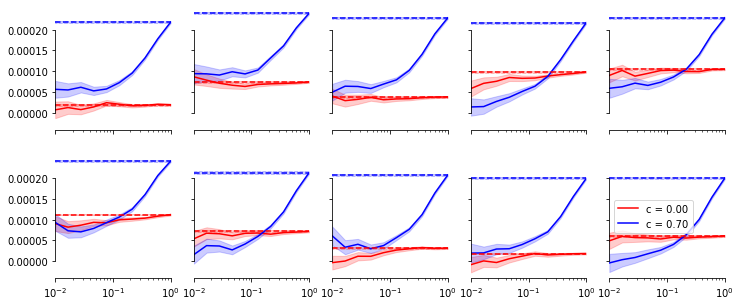

In [41]:
#Plot the causal effects as a function of p
fig,axes = plt.subplots(2,5,figsize=(12,5), sharex = True, sharey = True)

for u in range(10):
    #u = 1
    #for i in range(len(cvals)):
    #    #sns.tsplot(data = beta_rd_c[i,:,:,u], ax = ax, ci='sd', time=pvals)#, color='C%d'%i)
    #    sns.tsplot(data = beta_rd_c[i,:,:,u], ax = ax, time=pvals)#, color='C%d'%i)
    #    #ax.plot(pvals, m_beta_rd_c[i,-1,u]*ones(pvals.shape), '-.', color='C%d'%i)
    #sns.tsplot(data = beta_rd_c[0,:,:,u], ax = ax, time=pvals, color='red')
    i,j = divmod(u, 5)
    ax = axes[i,j]
    tsplot(ax, beta_rd_c[0,:,:,u], pvals, color='red')
    tsplot(ax, beta_rd_c[1,:,:,u], pvals, color='blue')
    tsplot(ax, beta_fd_c[0,:,:,u], pvals, color='red', linestyle = '--')
    tsplot(ax, beta_fd_c[1,:,:,u], pvals, color='blue', linestyle = '--')
    
    #tsplot(ax, beta_rd_c_linear[0,:,:,u], color='green')
    #tsplot(ax, beta_rd_c_linear[1,:,:,u], color='black')
    
    #ax.set_xlabel('window size $p$');
    #ax.set_ylabel('average causal effect');
    #ax.plot(pvals, beta_sp_c[0,u]*ones(pvals.shape), color=(0,0,0));
    #ax.set_ylim([3, 7])
    #ax.set_ylim([5.4, 5.9])
    #ax.set_xlim([0, 1])
    ax.set_xscale('log')
    #ax.set_xticks(pvals)
    sns.despine(trim=True)
ax.legend(["c = %.2f"%i for i in cvals]);
plt.savefig('./fig_5.pdf')